# Preprocessing & Feature Engineering Pipeline

This notebook contains the entire data preprocessing and feature engineering pipeline, the final output of this notebook (train_final.csv & test_final.csv) files are used as datasets for the deep learning modelling code.

In [1]:
import pandas as pd
import numpy as np
from datetime import date, timedelta
import gc
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [ ]:
# ## 1. Load Data and Basic Preprocessing
# Load datasets
data_oil = pd.read_csv('Dataset/oil.csv')
data_train = pd.read_csv('Dataset/train.csv')
data_test = pd.read_csv('Dataset/test.csv')
samp_subm = pd.read_csv('Dataset/sample_submission.csv')
data_holi = pd.read_csv('Dataset/holidays_events.csv')
data_store = pd.read_csv('Dataset/stores.csv')
data_trans = pd.read_csv('Dataset/transactions.csv')

# Convert date columns
for df in [data_oil, data_train, data_test, data_holi, data_trans]:
    df['date'] = pd.to_datetime(df['date'])
    
    


NULL AND NON-NULL VALUES ANALYSIS FOR HOLIDAYS DATA

Null values count per column:
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

Non-null values count per column:
date           350
type           350
locale         350
locale_name    350
description    350
transferred    350
dtype: int64

Total rows in holidays data: 350

Summary table:
        Column  Non-Null Count  Null Count  Null Percentage
0         date             350           0              0.0
1         type             350           0              0.0
2       locale             350           0              0.0
3  locale_name             350           0              0.0
4  description             350           0              0.0
5  transferred             350           0              0.0


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [ ]:
# %% [markdown]
# ## 2. Oil Missing Value Imputation

# Method 1: forward/backward fill, Method 2: interpolation, then average
method1 = data_oil['dcoilwtico'].fillna(method='ffill').fillna(method='bfill')
method2 = data_oil['dcoilwtico'].interpolate()
mask = data_oil['dcoilwtico'].isna()
data_oil.loc[mask, 'dcoilwtico'] = (method1[mask] + method2[mask]) / 2
data_oil['dcoilwtico'].fillna(method='ffill', inplace=True)
data_oil['dcoilwtico'].fillna(method='bfill', inplace=True)

print("Oil missing values filled:", data_oil['dcoilwtico'].isna().sum())

Oil missing values filled: 0

NULL AND NON-NULL VALUES ANALYSIS FOR OIL DATA

Null values count per column:
date          0
dcoilwtico    0
dtype: int64

Non-null values count per column:
date          1218
dcoilwtico    1218
dtype: int64


## EDA

Data shapes after preprocessing:
Number of oil samples: (1218, 2)
Number of train samples: (3000888, 6)
Number of test samples: (28512, 5)
Number of holidays samples: (350, 6)
Number of stores samples: (54, 5)
Number of transactions samples: (83488, 3)


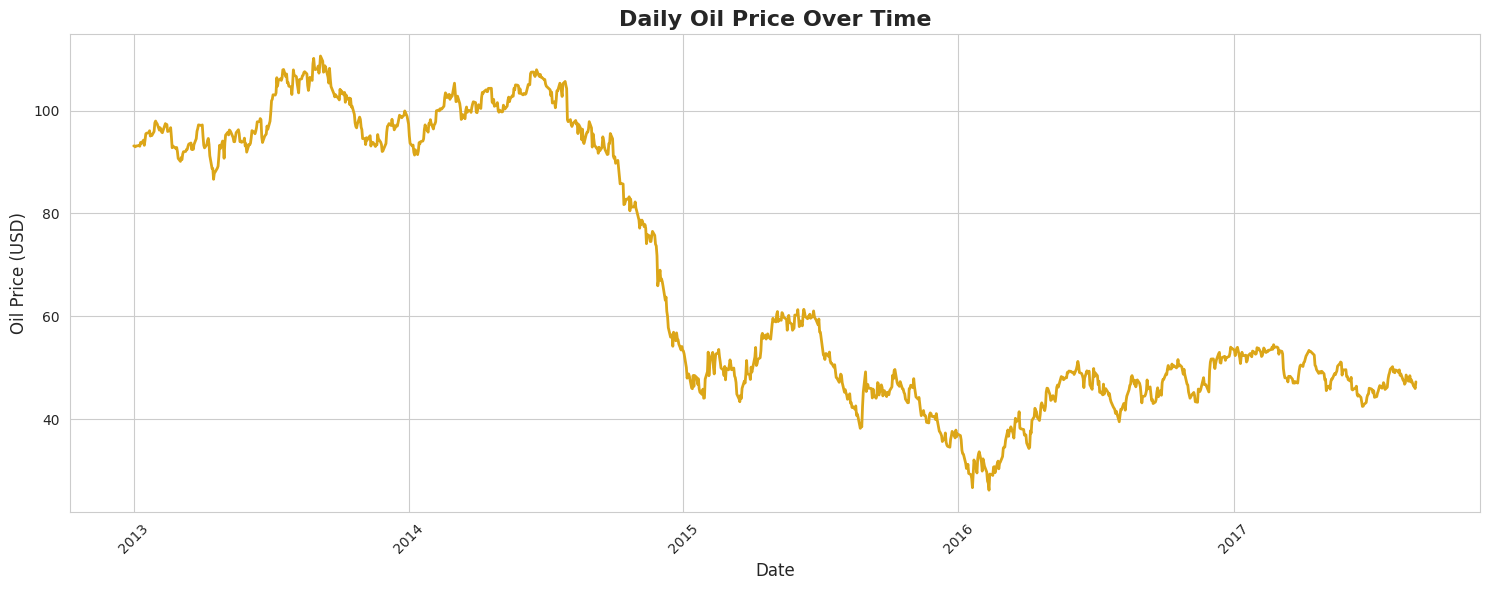

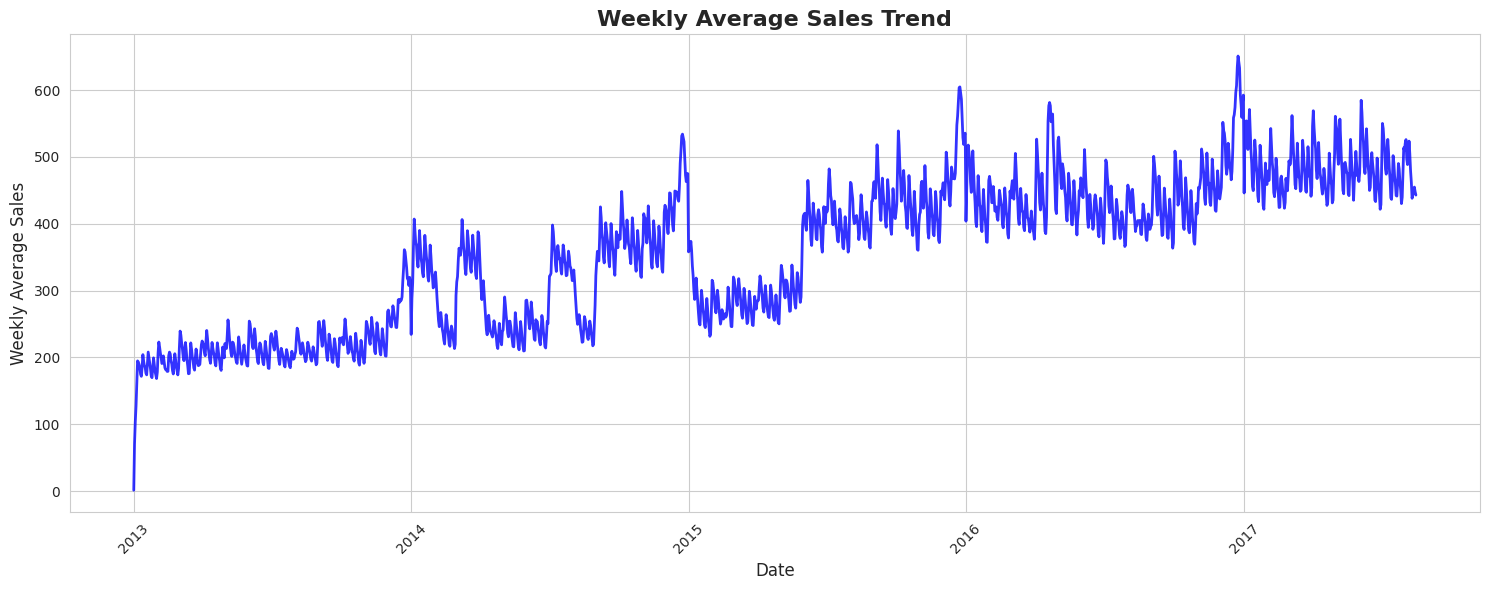

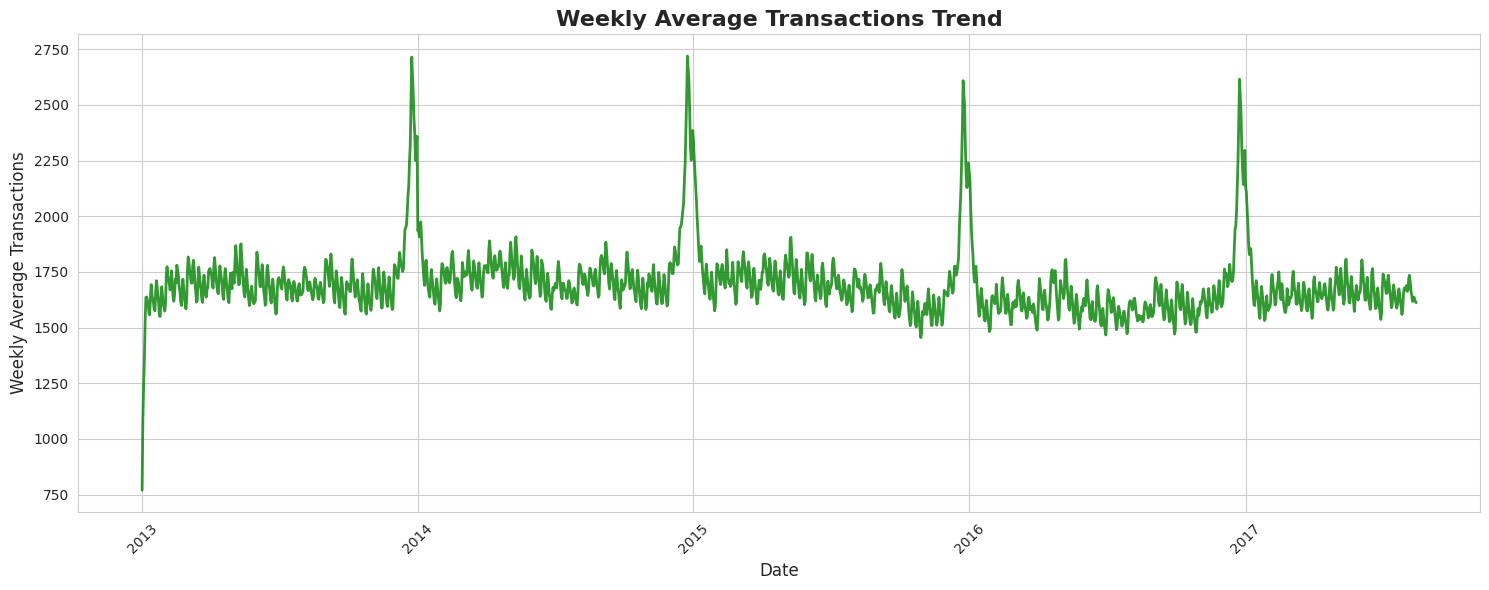


Correlation Matrix:
              dcoilwtico
sales          -0.690082
transactions    0.086822


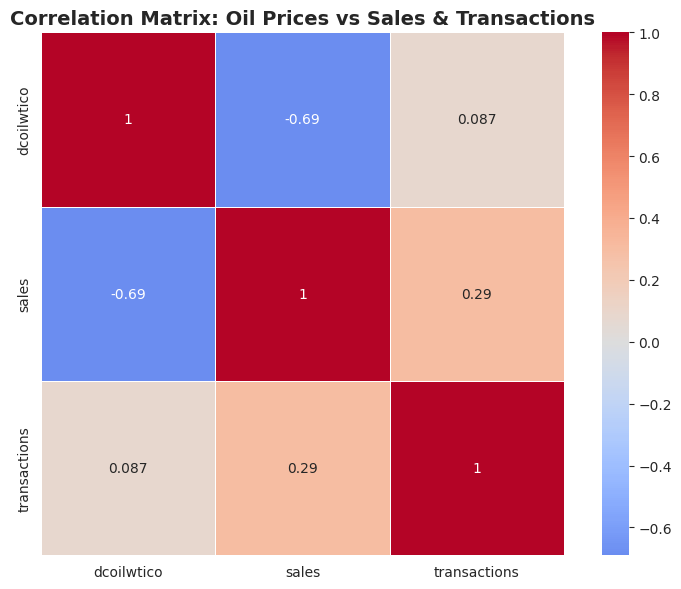

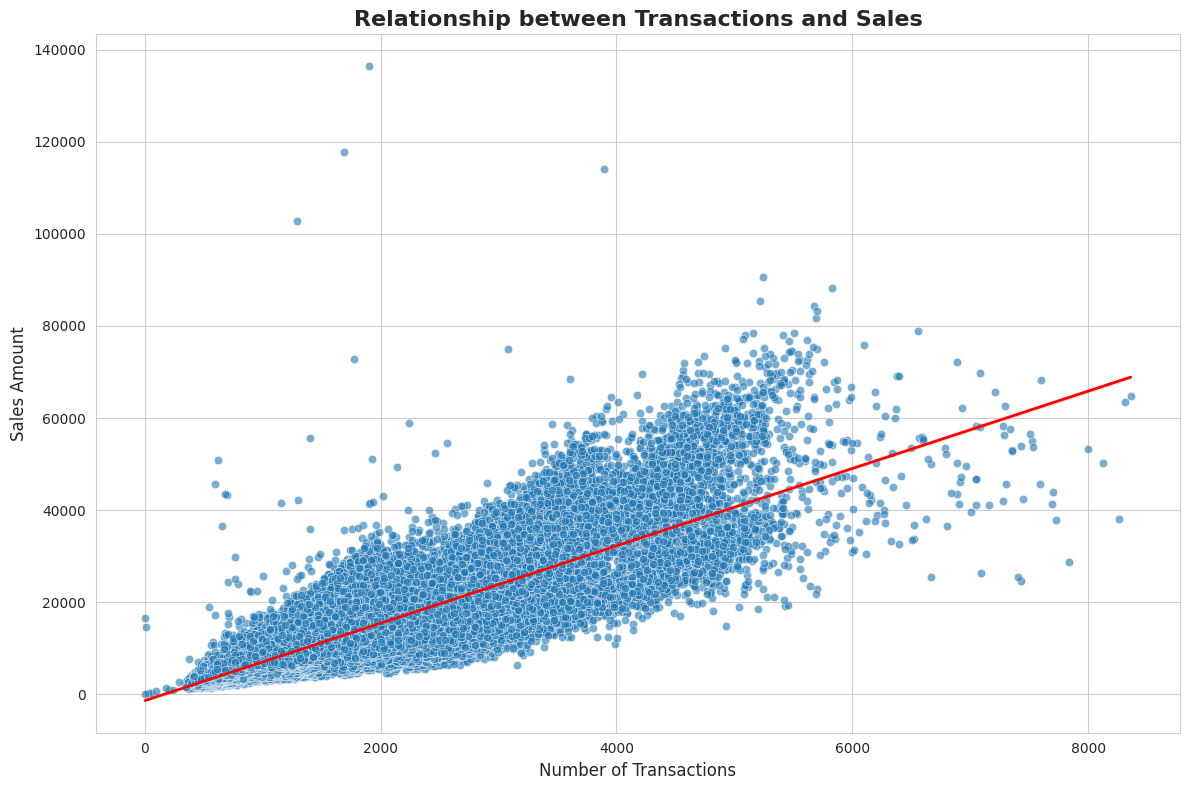

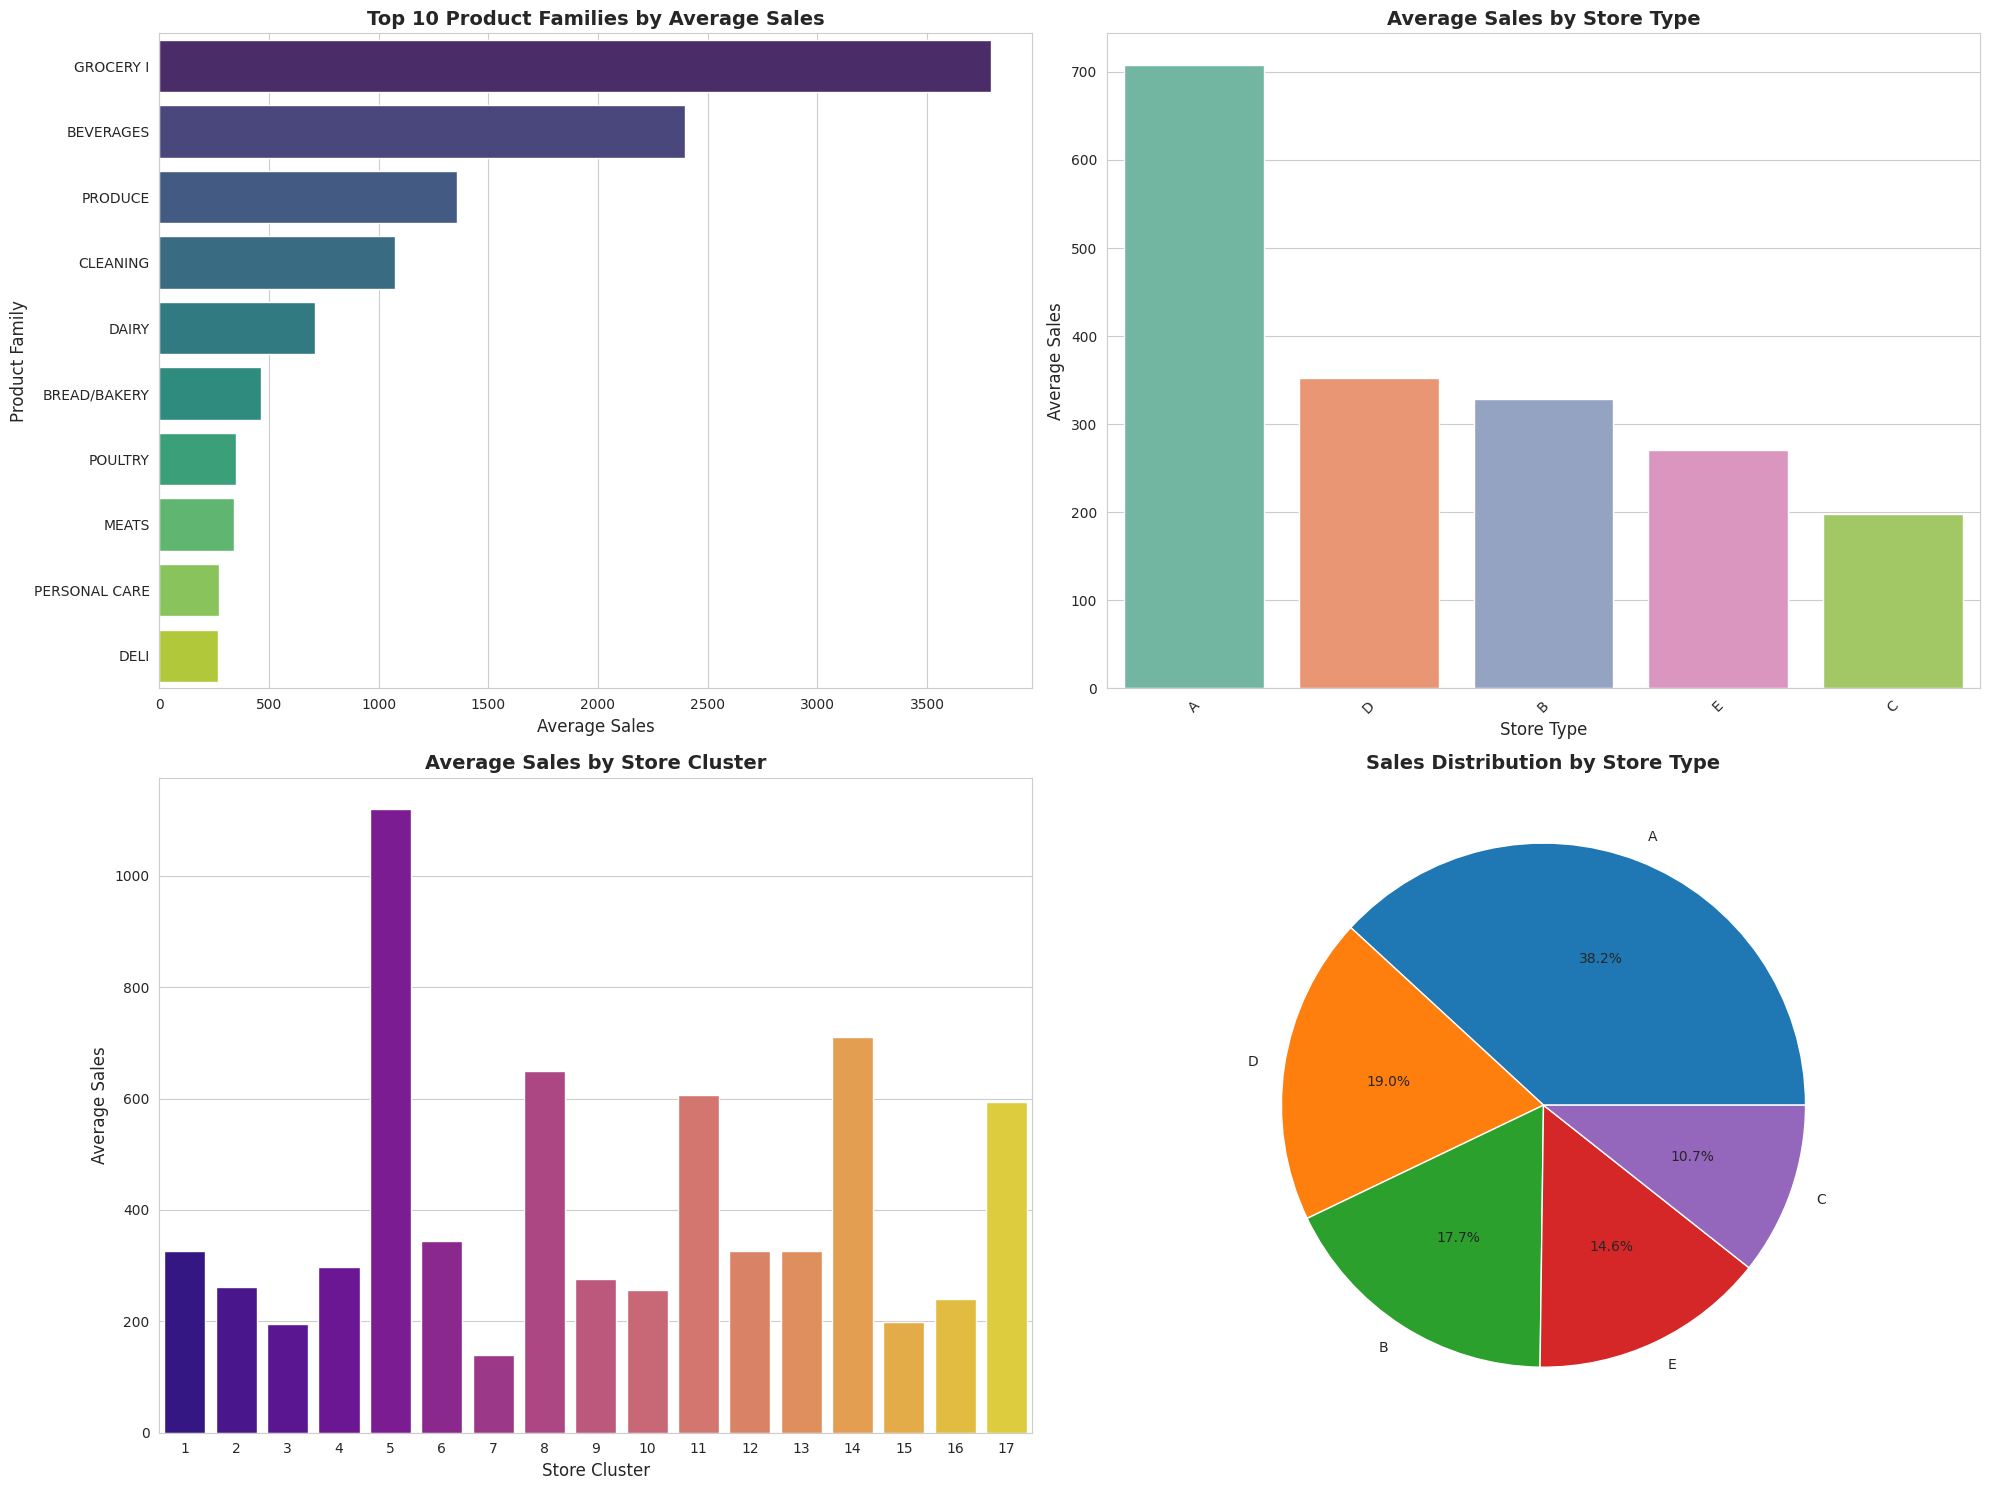


Total number of stores: 54
Top 5 performing stores by total sales:
    store_nbr         sales
43         44  6.208755e+07
44         45  5.449801e+07
46         47  5.094831e+07
2           3  5.048191e+07
48         49  4.342010e+07


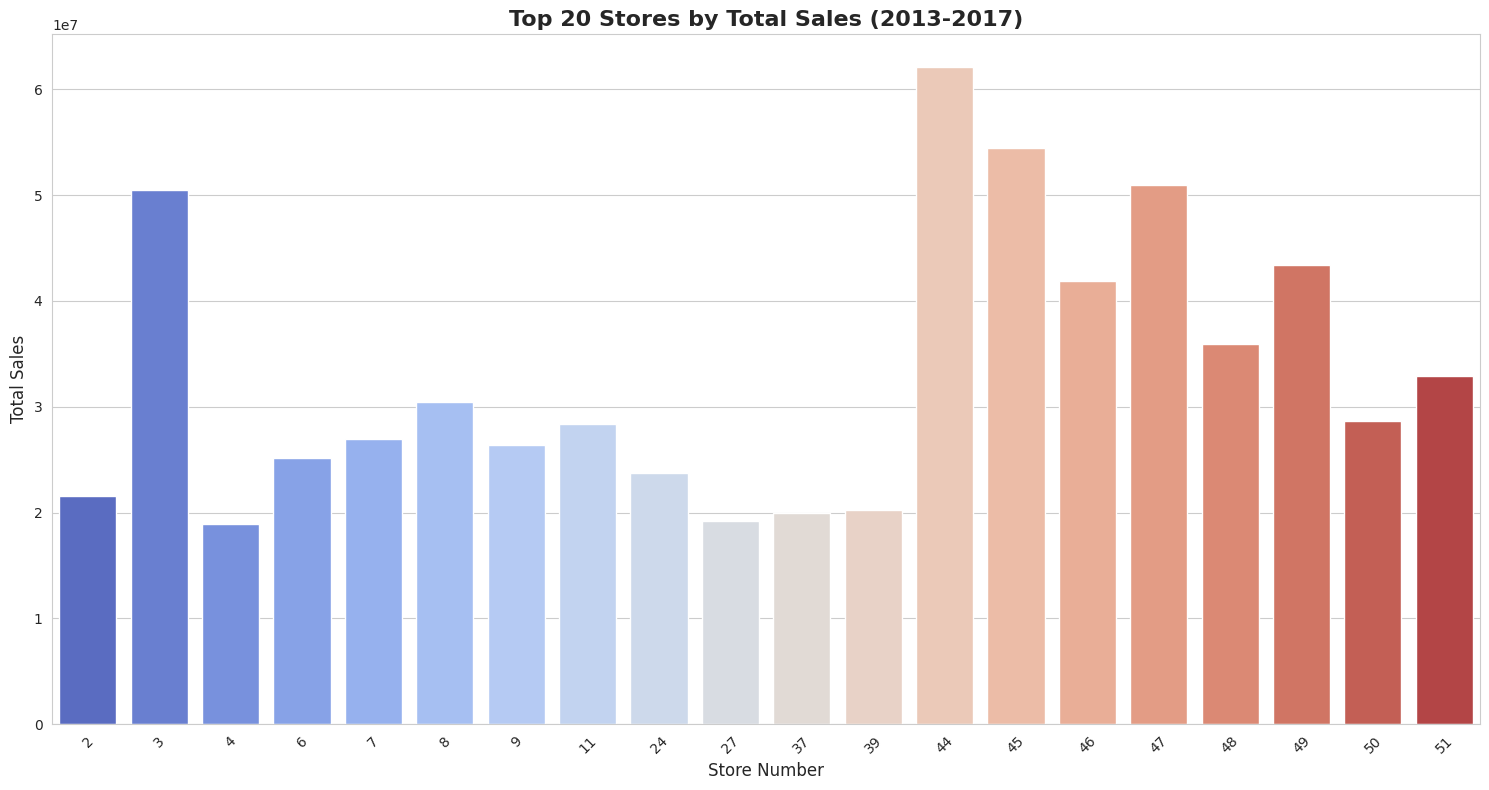

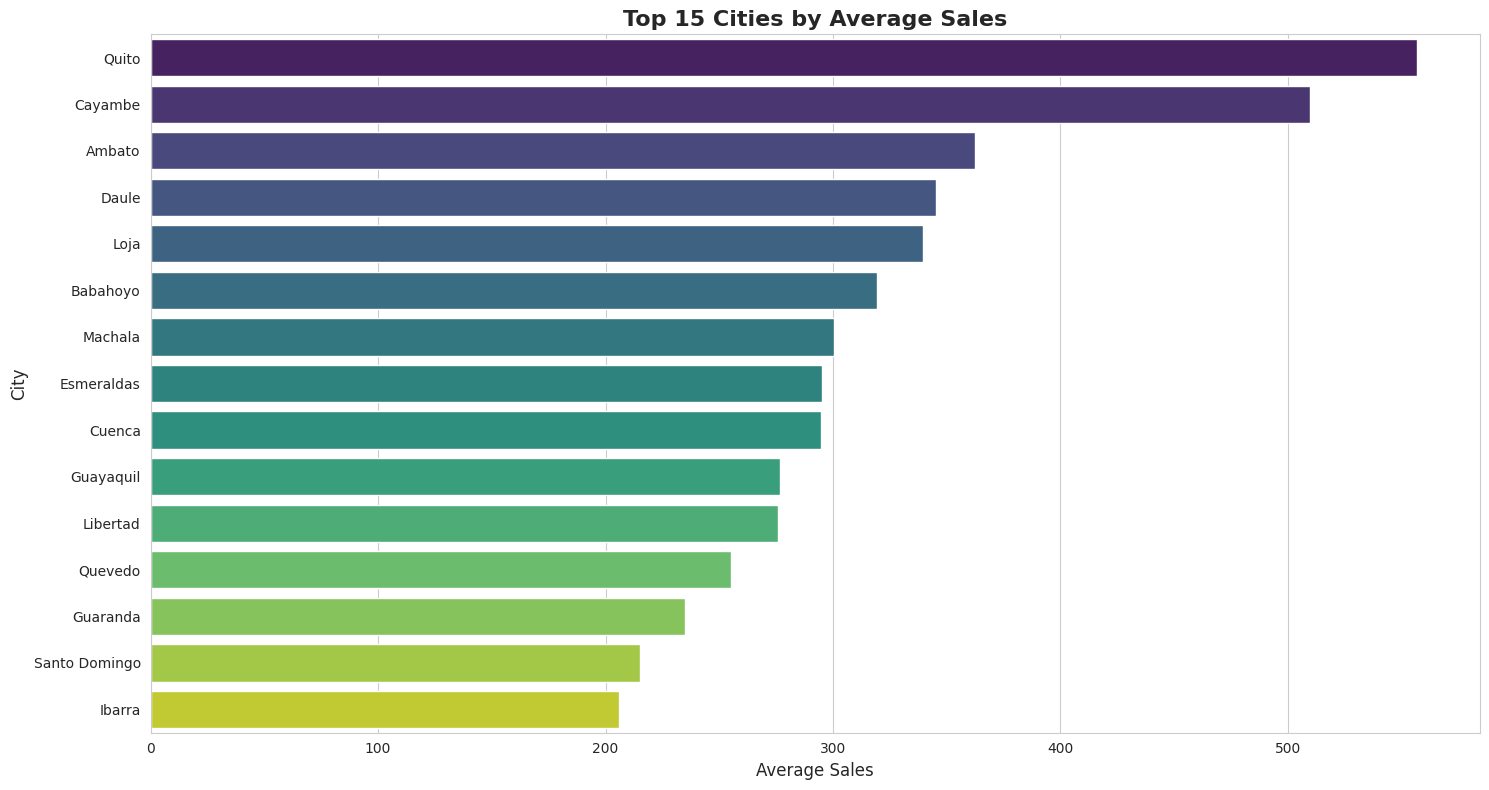

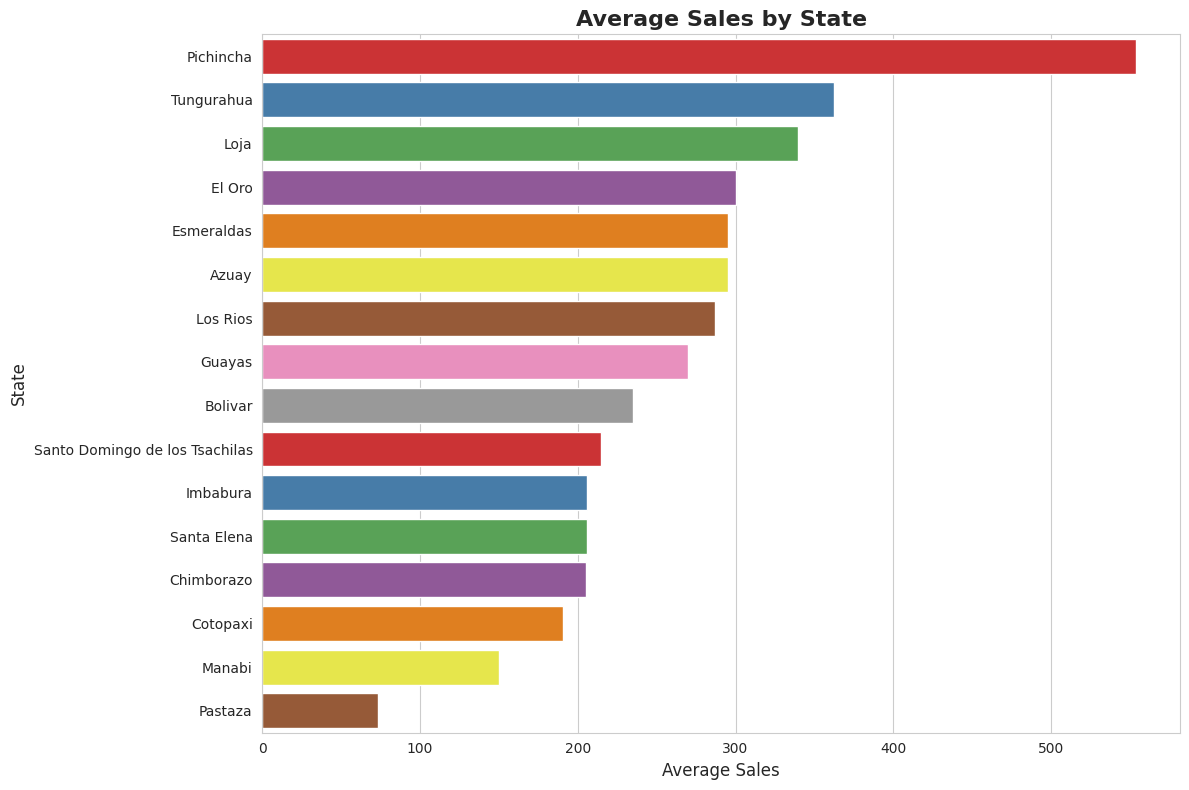

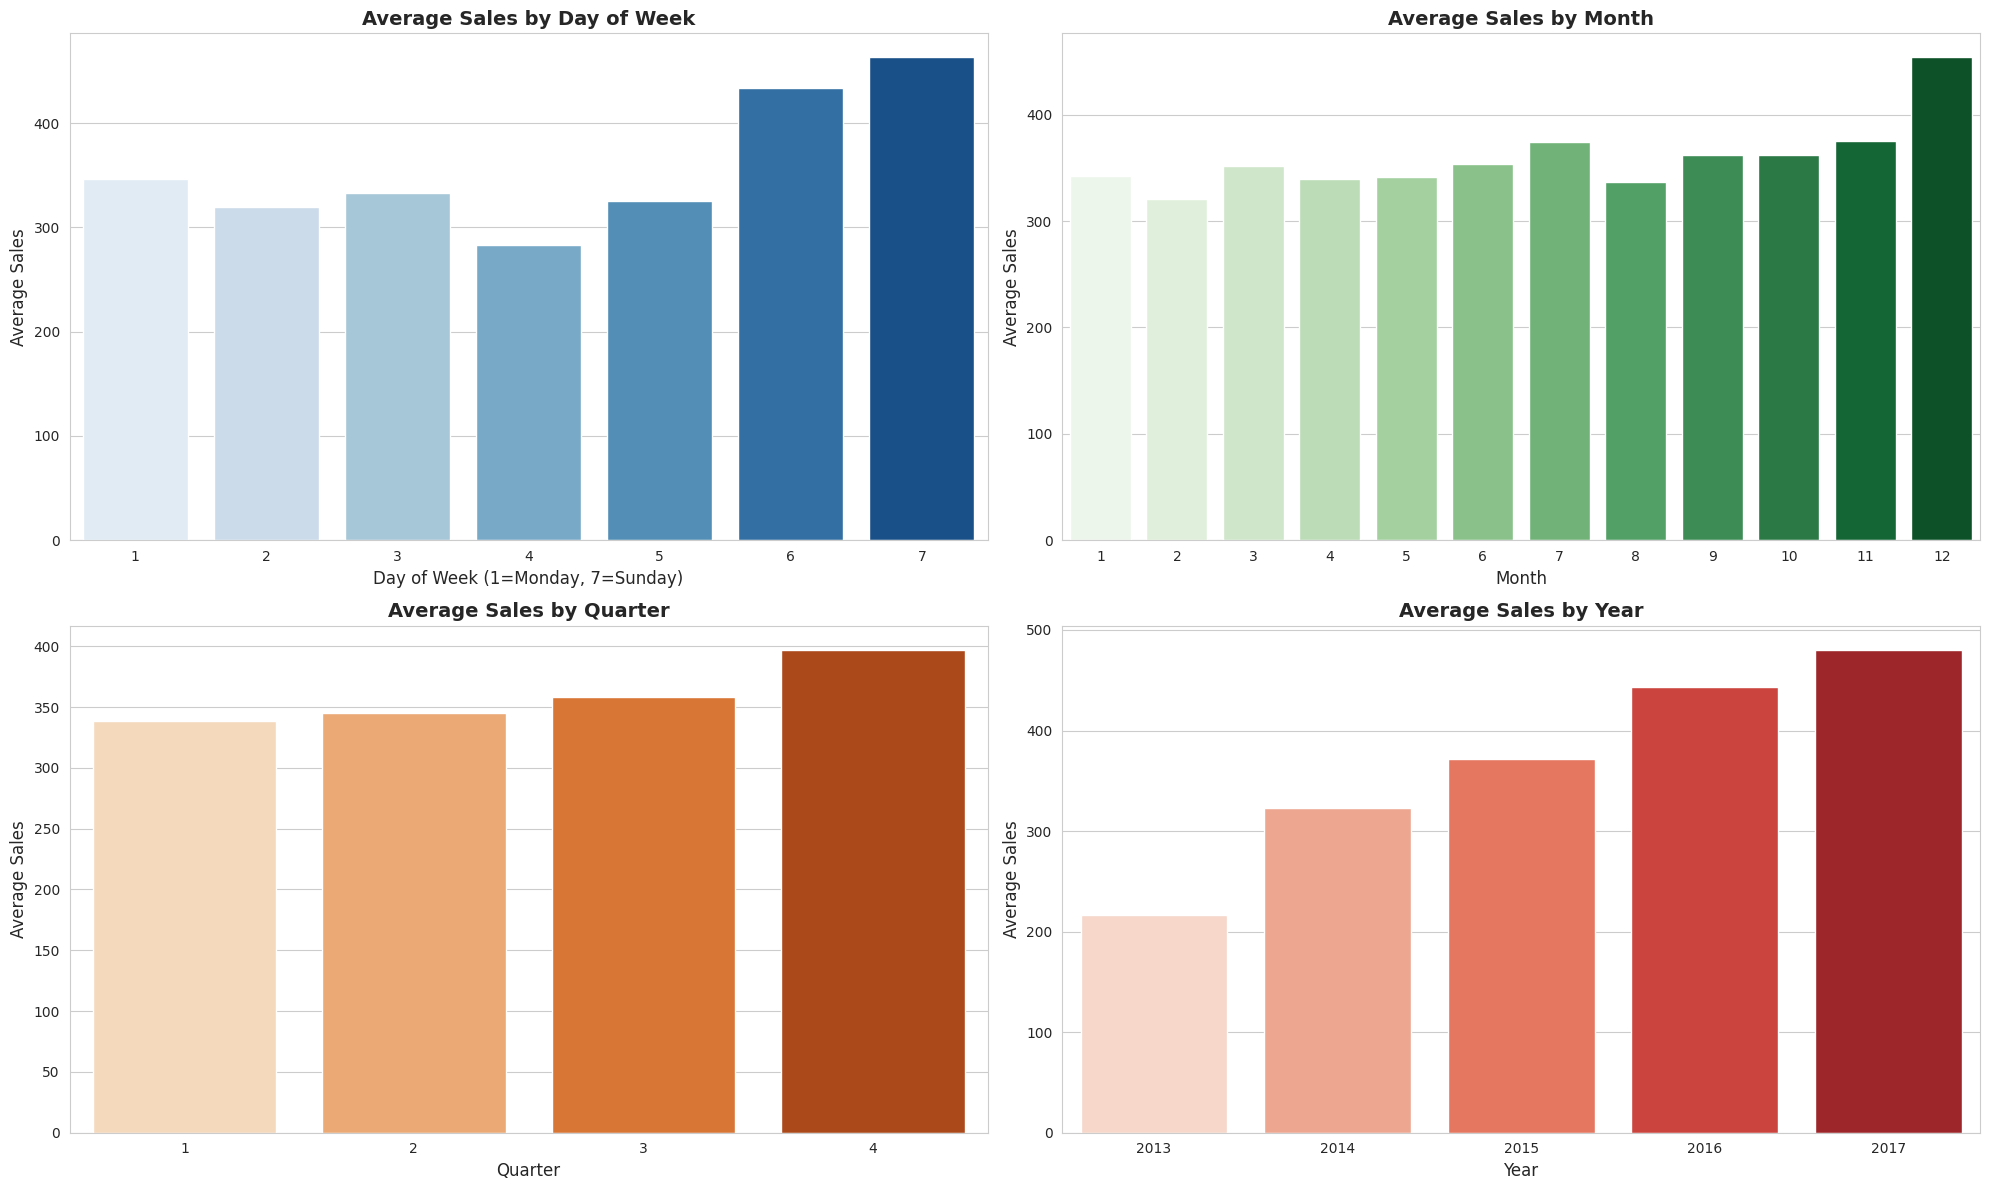

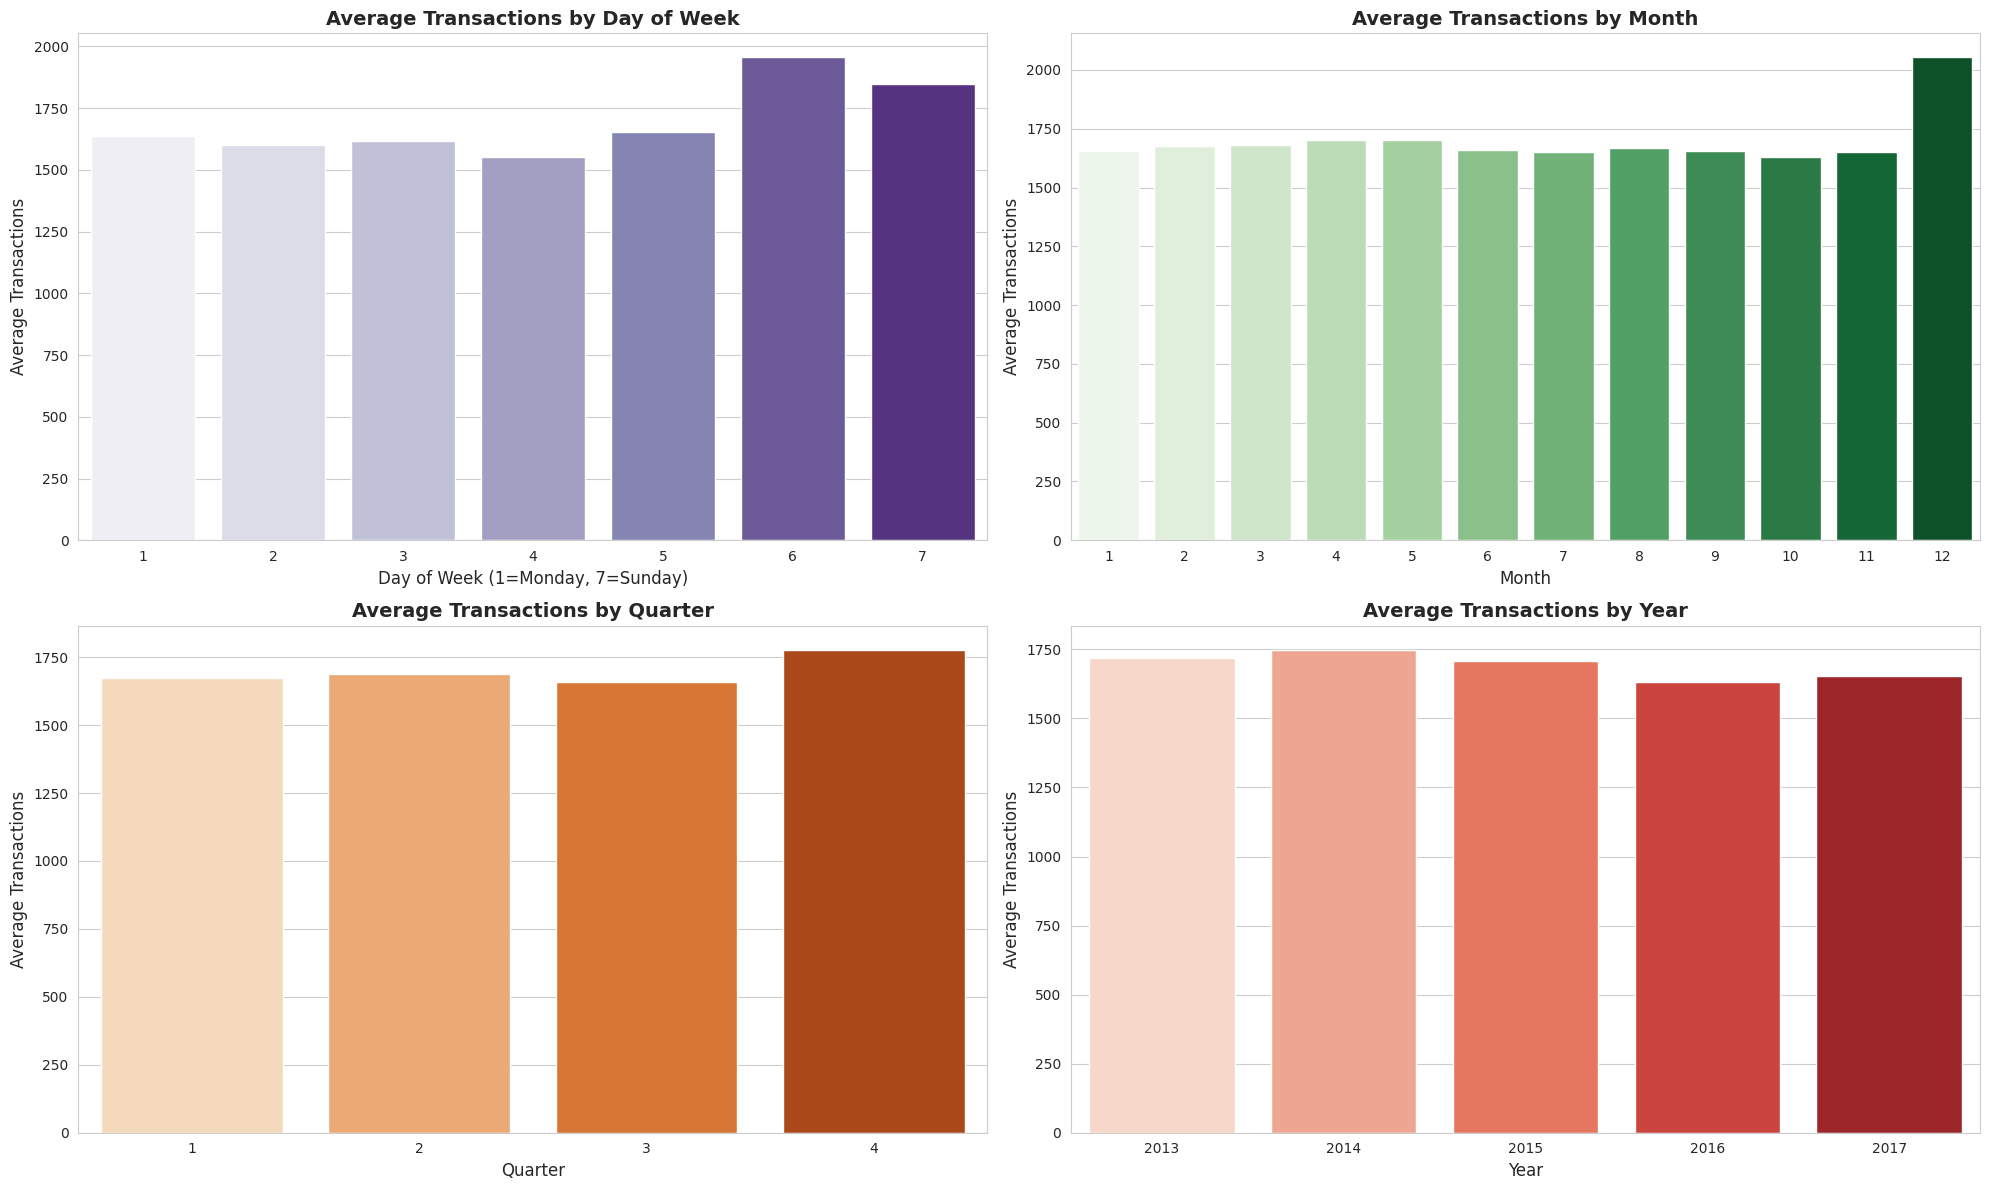

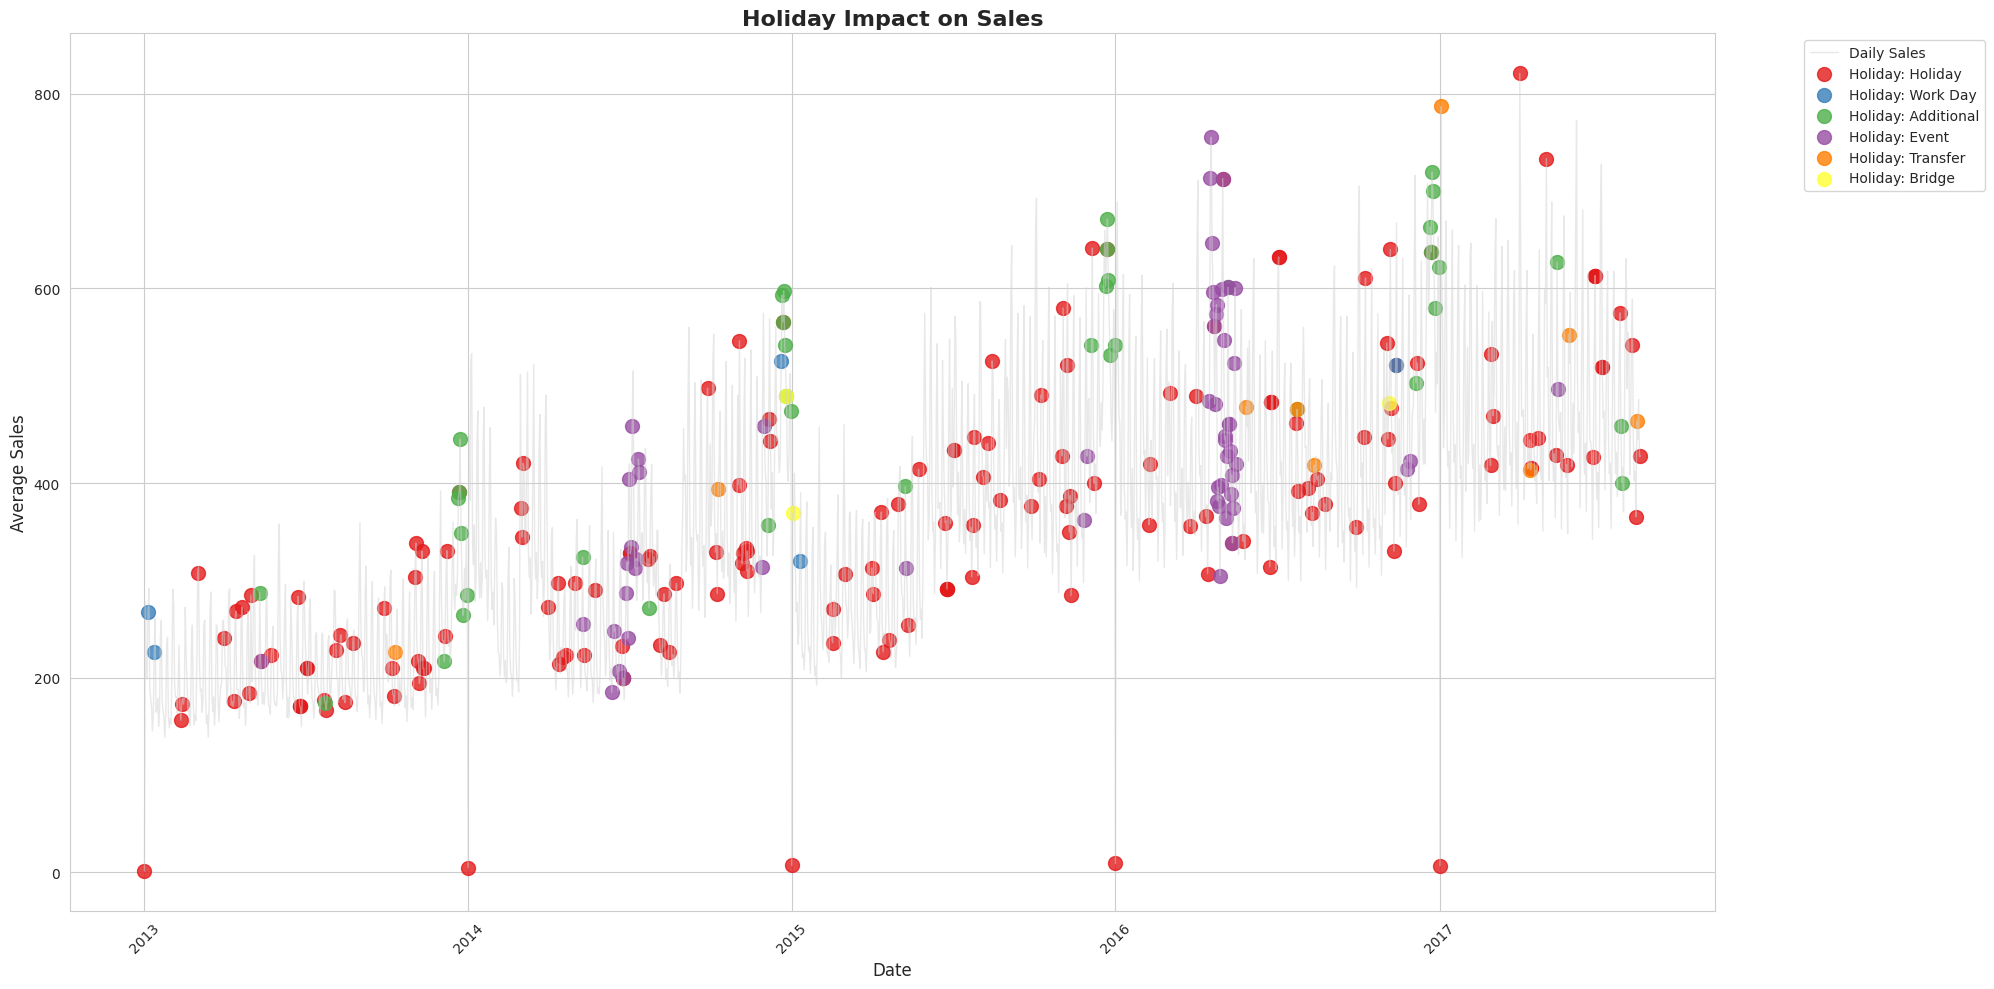


SUMMARY STATISTICS

Sales Statistics:
Average daily sales: $357.78
Median daily sales: $11.00
Standard deviation: $1102.00
Total sales in dataset: $1073644952.20

Transaction Statistics:
Average daily transactions: 1694.60
Median daily transactions: 1393.00
Standard deviation: 963.29

Oil Price Statistics:
Average oil price: $67.69
Median oil price: $53.20
Price volatility (std): $25.63

Store Information:
Total number of stores: 54
Number of cities: 22
Number of states: 16
Store types: ['D' 'B' 'C' 'E' 'A']

Product Information:
Number of product families: 33
Date range: 2013-01-01 00:00:00 to 2017-08-15 00:00:00
Number of training days: 1684

EDA Analysis Complete!


In [ ]:
# EDA Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

data_test_copy = data_test.copy()
data_train_copy = data_train.copy()
data_oil_copy = data_oil.copy()
data_holi_copy = data_holi.copy()
data_store_copy = data_store.copy()
data_trans_copy = data_trans.copy()

# =====================================================
# 1. DATA PREPROCESSING AND DATE CONVERSION
# =====================================================

# Convert date columns to datetime format for all datasets
# This is essential for time series analysis
data_trans_copy["date"] = pd.to_datetime(data_trans_copy["date"])
data_train_copy["date"] = pd.to_datetime(data_train_copy["date"])
data_test_copy["date"] = pd.to_datetime(data_test_copy["date"])
data_oil_copy["date"] = pd.to_datetime(data_oil_copy["date"])
data_holi_copy["date"] = pd.to_datetime(data_holi_copy["date"])

print("Data shapes after preprocessing:")
print(f'Number of oil samples: {data_oil_copy.shape}')
print(f'Number of train samples: {data_train_copy.shape}')
print(f'Number of test samples: {data_test_copy.shape}')
print(f'Number of holidays samples: {data_holi_copy.shape}')
print(f'Number of stores samples: {data_store_copy.shape}')
print(f'Number of transactions samples: {data_trans_copy.shape}')

# =====================================================
# 2. OIL PRICE ANALYSIS
# =====================================================

# Create a copy of oil data for analysis
oil_analysis = data_oil_copy.copy()

# Plot daily oil prices over time
# This shows the volatility of oil prices, which is important for Ecuador's economy
plt.figure(figsize=(15, 6))
plt.plot(oil_analysis['date'], oil_analysis['dcoilwtico'], color='#DCA618', linewidth=2)
plt.title('Daily Oil Price Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Oil Price (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# =====================================================
# 3. WEEKLY SALES AND TRANSACTIONS ANALYSIS
# =====================================================

# Calculate weekly average sales using exponential weighted moving average
# This smooths out daily fluctuations to show underlying trends
average_weekly_sales = data_train_copy.groupby('date').agg({'sales': 'mean'}).reset_index()
average_weekly_sales['week_sales'] = average_weekly_sales['sales'].ewm(span=7, adjust=False).mean()

# Plot weekly sales trend
plt.figure(figsize=(15, 6))
plt.plot(average_weekly_sales['date'], average_weekly_sales['week_sales'], 
         color='blue', linewidth=2, alpha=0.8)
plt.title('Weekly Average Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Average Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate weekly average transactions
# This shows customer traffic patterns over time
average_weekly_transactions = data_trans_copy.groupby('date').agg({'transactions': 'mean'}).reset_index()
average_weekly_transactions['week_transactions'] = average_weekly_transactions['transactions'].ewm(span=7, adjust=False).mean()

# Plot weekly transactions trend
plt.figure(figsize=(15, 6))
plt.plot(average_weekly_transactions['date'], average_weekly_transactions['week_transactions'], 
         color='green', linewidth=2, alpha=0.8)
plt.title('Weekly Average Transactions Trend', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Average Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# =====================================================
# 4. CORRELATION ANALYSIS
# =====================================================

# Merge oil, sales, and transaction data to analyze correlations
# This helps understand if oil prices (economic indicator) affect retail sales
correlation_data = data_oil_copy.copy()
correlation_data = correlation_data.merge(average_weekly_sales[['date', 'sales']], on='date', how='left')
correlation_data = correlation_data.merge(average_weekly_transactions[['date', 'transactions']], on='date', how='left')

# Calculate and display correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix = correlation_data[['dcoilwtico', 'sales', 'transactions']].corr()
print(correlation_matrix.loc[["sales", "transactions"], ["dcoilwtico"]])

# Visualize correlation with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix: Oil Prices vs Sales & Transactions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# =====================================================
# 5. SALES VS TRANSACTIONS RELATIONSHIP
# =====================================================

# Merge daily sales and transactions data to understand their relationship
# This shows if more customer visits translate to higher sales
sales_transactions_data = data_train_copy.groupby(["date", "store_nbr"]).sales.sum().reset_index()
sales_transactions_data = sales_transactions_data.merge(data_trans_copy, on=['date', 'store_nbr'], how='left')

# Create scatter plot with regression line
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sales_transactions_data, x='transactions', y='sales', alpha=0.6)
sns.regplot(data=sales_transactions_data, x='transactions', y='sales', 
           scatter=False, color='red', line_kws={'linewidth': 2})
plt.title('Relationship between Transactions and Sales', fontsize=16, fontweight='bold')
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.tight_layout()
plt.show()

# =====================================================
# 6. COMPREHENSIVE SALES ANALYSIS
# =====================================================

# Create comprehensive sales dataset by merging all relevant information
# This enables analysis across multiple dimensions
sales_df = data_train_copy.merge(data_holi_copy, on='date', how='left')
sales_df = sales_df.merge(data_store_copy, on='store_nbr', how='left')
sales_df = sales_df.rename(columns={"type_x": "holiday_type", "type_y": "store_type"})

# Analyze sales by product family (top 10)
# This identifies which product categories drive the most sales
df_family_sales = sales_df.groupby('family').agg({'sales': 'mean'}).reset_index()
df_family_sales = df_family_sales.sort_values(by='sales', ascending=False)[:10]

# Analyze sales by store type
# This shows which store formats perform better
df_type_sales = sales_df.groupby('store_type').agg({'sales': 'mean'}).reset_index()
df_type_sales = df_type_sales.sort_values(by='sales', ascending=False)

# Analyze sales by store cluster
# This reveals which store clusters are most profitable
df_cluster_sales = sales_df.groupby('cluster').agg({'sales': 'mean'}).reset_index()
df_cluster_sales = df_cluster_sales.sort_values(by='sales', ascending=False)

# Create subplot figure for multiple analyses
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Top 10 Product Family Sales
sns.barplot(data=df_family_sales, y='family', x='sales', ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Top 10 Product Families by Average Sales', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Average Sales', fontsize=12)
axes[0,0].set_ylabel('Product Family', fontsize=12)

# Sales by Store Type
sns.barplot(data=df_type_sales, x='store_type', y='sales', ax=axes[0,1], palette='Set2')
axes[0,1].set_title('Average Sales by Store Type', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Store Type', fontsize=12)
axes[0,1].set_ylabel('Average Sales', fontsize=12)
axes[0,1].tick_params(axis='x', rotation=45)

# Sales by Cluster
sns.barplot(data=df_cluster_sales, x='cluster', y='sales', ax=axes[1,0], palette='plasma')
axes[1,0].set_title('Average Sales by Store Cluster', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Store Cluster', fontsize=12)
axes[1,0].set_ylabel('Average Sales', fontsize=12)

# Store Type Distribution (Pie chart alternative with bar chart)
store_counts = df_type_sales['store_type'].value_counts()
axes[1,1].pie(df_type_sales['sales'], labels=df_type_sales['store_type'], autopct='%1.1f%%')
axes[1,1].set_title('Sales Distribution by Store Type', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# =====================================================
# 7. STORE PERFORMANCE ANALYSIS
# =====================================================

# Analyze total sales by individual stores
# This identifies top and bottom performing stores
store_sales_total = data_train_copy.groupby("store_nbr").agg({"sales": "sum"}).reset_index()
store_sales_total = store_sales_total.sort_values(by='sales', ascending=False)

print(f'\nTotal number of stores: {len(data_train_copy.store_nbr.unique())}')
print(f'Top 5 performing stores by total sales:')
print(store_sales_total.head())

# Plot top 20 stores by sales
plt.figure(figsize=(15, 8))
top_20_stores = store_sales_total.head(20)
sns.barplot(data=top_20_stores, x='store_nbr', y='sales', palette='coolwarm')
plt.title('Top 20 Stores by Total Sales (2013-2017)', fontsize=16, fontweight='bold')
plt.xlabel('Store Number', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# =====================================================
# 8. GEOGRAPHIC ANALYSIS
# =====================================================

# Analyze sales performance by city and state
# This shows geographic patterns in sales performance
df_city_state = data_train_copy.merge(data_store_copy, on='store_nbr')
df_city_sales = df_city_state.groupby("city").sales.mean().sort_values(ascending=False).reset_index()
df_state_sales = df_city_state.groupby("state").sales.mean().sort_values(ascending=False).reset_index()

# Plot sales by city (top 15)
plt.figure(figsize=(15, 8))
top_cities = df_city_sales.head(15)
sns.barplot(data=top_cities, y='city', x='sales', palette='viridis')
plt.title('Top 15 Cities by Average Sales', fontsize=16, fontweight='bold')
plt.xlabel('Average Sales', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.show()

# Plot sales by state
plt.figure(figsize=(12, 8))
sns.barplot(data=df_state_sales, y='state', x='sales', palette='Set1')
plt.title('Average Sales by State', fontsize=16, fontweight='bold')
plt.xlabel('Average Sales', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.show()

# =====================================================
# 9. TEMPORAL ANALYSIS - SALES PATTERNS
# =====================================================

# Analyze sales patterns across different time periods
# This reveals seasonal and cyclical patterns in sales
date_sales = data_train_copy.groupby('date').agg({'sales': 'mean'}).reset_index()
date_sales['day_of_week'] = date_sales['date'].dt.dayofweek + 1  # Monday=1, Sunday=7
date_sales['month'] = date_sales['date'].dt.month
date_sales['quarter'] = date_sales['date'].dt.quarter
date_sales['year'] = date_sales['date'].dt.year

# Calculate averages for each time period
day_sales = date_sales.groupby('day_of_week').mean()['sales'].reset_index()
month_sales = date_sales.groupby('month').mean()['sales'].reset_index()
quarter_sales = date_sales.groupby('quarter').mean()['sales'].reset_index()
year_sales = date_sales.groupby('year').mean()['sales'].reset_index()

# Create subplots for temporal analysis
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Sales by day of week (1=Monday, 7=Sunday)
# This shows which days customers shop more
sns.barplot(data=day_sales, x='day_of_week', y='sales', ax=axes[0,0], palette='Blues')
axes[0,0].set_title('Average Sales by Day of Week', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Day of Week (1=Monday, 7=Sunday)', fontsize=12)
axes[0,0].set_ylabel('Average Sales', fontsize=12)

# Sales by month
# This reveals seasonal shopping patterns
sns.barplot(data=month_sales, x='month', y='sales', ax=axes[0,1], palette='Greens')
axes[0,1].set_title('Average Sales by Month', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Month', fontsize=12)
axes[0,1].set_ylabel('Average Sales', fontsize=12)

# Sales by quarter
# This shows quarterly business cycles
sns.barplot(data=quarter_sales, x='quarter', y='sales', ax=axes[1,0], palette='Oranges')
axes[1,0].set_title('Average Sales by Quarter', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Quarter', fontsize=12)
axes[1,0].set_ylabel('Average Sales', fontsize=12)

# Sales by year
# This shows overall business growth/decline trends
sns.barplot(data=year_sales, x='year', y='sales', ax=axes[1,1], palette='Reds')
axes[1,1].set_title('Average Sales by Year', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Year', fontsize=12)
axes[1,1].set_ylabel('Average Sales', fontsize=12)

plt.tight_layout()
plt.show()

# =====================================================
# 10. TEMPORAL ANALYSIS - TRANSACTIONS PATTERNS
# =====================================================

# Analyze transaction patterns across different time periods
# This shows customer visit patterns
date_trans = data_trans_copy.groupby('date').agg({'transactions': 'mean'}).reset_index()
date_trans['day_of_week'] = date_trans['date'].dt.dayofweek + 1
date_trans['month'] = date_trans['date'].dt.month
date_trans['quarter'] = date_trans['date'].dt.quarter
date_trans['year'] = date_trans['date'].dt.year

# Calculate averages for each time period
day_trans = date_trans.groupby('day_of_week').mean()['transactions'].reset_index()
month_trans = date_trans.groupby('month').mean()['transactions'].reset_index()
quarter_trans = date_trans.groupby('quarter').mean()['transactions'].reset_index()
year_trans = date_trans.groupby('year').mean()['transactions'].reset_index()

# Create subplots for transaction temporal analysis
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Transactions by day of week
sns.barplot(data=day_trans, x='day_of_week', y='transactions', ax=axes[0,0], palette='Purples')
axes[0,0].set_title('Average Transactions by Day of Week', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Day of Week (1=Monday, 7=Sunday)', fontsize=12)
axes[0,0].set_ylabel('Average Transactions', fontsize=12)

# Transactions by month
sns.barplot(data=month_trans, x='month', y='transactions', ax=axes[0,1], palette='Greens')
axes[0,1].set_title('Average Transactions by Month', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Month', fontsize=12)
axes[0,1].set_ylabel('Average Transactions', fontsize=12)

# Transactions by quarter
sns.barplot(data=quarter_trans, x='quarter', y='transactions', ax=axes[1,0], palette='Oranges')
axes[1,0].set_title('Average Transactions by Quarter', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Quarter', fontsize=12)
axes[1,0].set_ylabel('Average Transactions', fontsize=12)

# Transactions by year
sns.barplot(data=year_trans, x='year', y='transactions', ax=axes[1,1], palette='Reds')
axes[1,1].set_title('Average Transactions by Year', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Year', fontsize=12)
axes[1,1].set_ylabel('Average Transactions', fontsize=12)

plt.tight_layout()
plt.show()

# =====================================================
# 11. HOLIDAY IMPACT ANALYSIS
# =====================================================

# Analyze the impact of holidays on sales
# This shows how special events affect customer behavior
sales_sum = data_train_copy.groupby('date').agg({'sales': 'mean'}).reset_index()

# Filter holidays within the training period
holidays_filtered = data_holi_copy[
    (data_holi_copy['date'] >= '2013-01-01') & 
    (data_holi_copy['date'] <= '2017-08-15')
].copy()

# Merge holiday data with sales data
holiday_sales = holidays_filtered.merge(sales_sum, on='date', how='left')

# Create the holiday impact visualization
plt.figure(figsize=(20, 10))

# Plot all sales data as background
plt.plot(sales_sum['date'], sales_sum['sales'], 
         color='lightgray', alpha=0.5, linewidth=1, label='Daily Sales')

# Plot holiday sales as colored points
holiday_types = holiday_sales['type'].unique()
colors = sns.color_palette('Set1', len(holiday_types))

for i, htype in enumerate(holiday_types):
    if pd.notna(htype):  # Skip NaN values
        holiday_subset = holiday_sales[holiday_sales['type'] == htype]
        plt.scatter(holiday_subset['date'], holiday_subset['sales'], 
                   color=colors[i], s=100, alpha=0.8, label=f'Holiday: {htype}')

plt.title('Holiday Impact on Sales', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# =====================================================
# 12. SUMMARY STATISTICS
# =====================================================

print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)

print(f"\nSales Statistics:")
print(f"Average daily sales: ${data_train_copy['sales'].mean():.2f}")
print(f"Median daily sales: ${data_train_copy['sales'].median():.2f}")
print(f"Standard deviation: ${data_train_copy['sales'].std():.2f}")
print(f"Total sales in dataset: ${data_train_copy['sales'].sum():.2f}")

print(f"\nTransaction Statistics:")
print(f"Average daily transactions: {data_trans_copy['transactions'].mean():.2f}")
print(f"Median daily transactions: {data_trans_copy['transactions'].median():.2f}")
print(f"Standard deviation: {data_trans_copy['transactions'].std():.2f}")

print(f"\nOil Price Statistics:")
print(f"Average oil price: ${data_oil_copy['dcoilwtico'].mean():.2f}")
print(f"Median oil price: ${data_oil_copy['dcoilwtico'].median():.2f}")
print(f"Price volatility (std): ${data_oil_copy['dcoilwtico'].std():.2f}")

print(f"\nStore Information:")
print(f"Total number of stores: {len(data_store_copy)}")
print(f"Number of cities: {data_store_copy['city'].nunique()}")
print(f"Number of states: {data_store_copy['state'].nunique()}")
print(f"Store types: {data_store_copy['type'].unique()}")

print(f"\nProduct Information:")
print(f"Number of product families: {data_train_copy['family'].nunique()}")
print(f"Date range: {data_train_copy['date'].min()} to {data_train_copy['date'].max()}")
print(f"Number of training days: {data_train_copy['date'].nunique()}")

print("\nEDA Analysis Complete!")
print("="*50)

## Data Preprocessing & Feature Engineering : 

In [ ]:
# ## 3. Merge Datasets

# Merge in sequence: train/test + oil + store + holiday + transactions
train_merged = data_train.merge(data_oil, on='date', how='left')\
                         .merge(data_store, on='store_nbr', how='left')\
                         .merge(data_holi, on='date', how='left')\
                         .merge(data_trans, on=['date','store_nbr'], how='left')

test_merged  = data_test.merge(data_oil, on='date', how='left')\
                         .merge(data_store, on='store_nbr', how='left')\
                         .merge(data_holi, on='date', how='left')\
                         .merge(data_trans, on=['date','store_nbr'], how='left')

print("Train merged shape:", train_merged.shape)
print("Test merged shape:", test_merged.shape)

Train merged shape: (3054348, 17)
Test merged shape: (28512, 16)


In [ ]:
# ## 4. Date Features, Missing Fill, Drop Unused Columns

for df in [train_merged, test_merged]:
    # Date features
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['dayofweek'] = df['date'].dt.dayofweek

    # Fill missing transactions
    df['transactions'].fillna(0, inplace=True)

    # Drop columns not used
    df.drop(['description', 'transferred'], axis=1, inplace=True)

print("Date features added and unused columns dropped.")

Date features added and unused columns dropped.


In [ ]:
# ## 5. Rolling Promotion Features

for df in [train_merged, test_merged]:
    df.sort_values(['store_nbr','family','date'], inplace=True)
    df['promo_roll_sum_7']  = df.groupby(['store_nbr','family'])['onpromotion']\
                                 .transform(lambda x: x.rolling(7,  min_periods=1).sum())
    df['promo_roll_sum_30'] = df.groupby(['store_nbr','family'])['onpromotion']\
                                 .transform(lambda x: x.rolling(30, min_periods=1).sum())

print("Rolling promotion features created.")

Rolling promotion features created.


In [ ]:
# ## 6. Weekend, Holiday Flags & Interaction Features

for df in [train_merged, test_merged]:
    # Weekend flag
    df['is_weekend'] = df['dayofweek'].isin([5,6]).astype(int)
    # Holiday flag
    df['is_holiday'] = (df['type_y'] == 'Holiday').astype(int)

    # Interaction features
    df['promo_weekend_interaction'] = df['onpromotion'] * df['is_weekend']
    df['store_family_interaction']  = df['store_nbr'].astype(str) + '_' + df['family']
    df['onpromo_promo_sum7_interaction'] = df['onpromotion'].astype(str) + '_' + df['promo_roll_sum_7'].astype(str)
    df['onpromo_state_interaction'] = df['onpromotion'].astype(str) + '_' + df['state']
    df['promo_sum7_state_interaction'] = df['promo_roll_sum_7'].astype(str) + '_' + df['state']

print("Weekend, holiday flags and interactions generated.")

Weekend, holiday flags and interactions generated.


In [ ]:
# ## 7. Label Encoding of Categorical Features

from sklearn.preprocessing import LabelEncoder

categorical_cols = [
    'family','city','state','type_x','type_y','locale_name',
    'store_family_interaction','promo_sum7_state_interaction',
    'onpromo_state_interaction','onpromo_promo_sum7_interaction'
]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    vals = pd.concat([
        train_merged[col].fillna('missing'),
        test_merged[col].fillna('missing')
    ]).unique()
    le.fit(vals)
    train_merged[col] = le.transform(train_merged[col].fillna('missing'))
    test_merged[col]  = le.transform(test_merged[col].fillna('missing'))
    label_encoders[col] = le

print("Label encoding completed.")

Label encoding completed.


In [ ]:
# ## 8. Additional Feature Engineering

# 8.1 Cyclical Encoding for Month & Day of Week
for df in [train_merged, test_merged]:
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    df['dow_sin']   = np.sin(2 * np.pi * df['dayofweek'] / 7)
    df['dow_cos']   = np.cos(2 * np.pi * df['dayofweek'] / 7)

# 8.2 Oil Price Momentum
data_oil = data_oil.sort_values('date')
data_oil['oil_pct_change'] = data_oil['dcoilwtico'].pct_change().fillna(0)
train_merged = train_merged.merge(data_oil[['date','oil_pct_change']], on='date', how='left')
test_merged  = test_merged.merge(data_oil[['date','oil_pct_change']], on='date', how='left')

# 8.3 Days Since Last Promotion
for df in [train_merged, test_merged]:
    df['last_promo_date'] = df['date'].where(df['onpromotion']==1)
    df['last_promo_date'] = df.groupby(['store_nbr','family'])['last_promo_date'].fillna(method='ffill')
    df['days_since_last_promo'] = (df['date'] - df['last_promo_date']).dt.days.fillna(-1).astype(int)
    df.drop('last_promo_date', axis=1, inplace=True)

# 8.4 Holiday Proximity Features
holiday_dates = np.sort(data_holi[data_holi['type']=='Holiday']['date'].unique())

def compute_holiday_proximity(dates):
    next_idx = np.searchsorted(holiday_dates, dates)
    prev_idx = np.maximum(next_idx - 1, 0)
    days_to = (holiday_dates[next_idx] - dates).astype('timedelta64[D]').astype(int)
    days_from = (dates - holiday_dates[prev_idx]).astype('timedelta64[D]').astype(int)
    return days_to, days_from

for df in [train_merged, test_merged]:
    days_to, days_from = compute_holiday_proximity(df['date'].values)
    df['days_to_holiday']   = days_to
    df['days_from_holiday'] = days_from

print("Additional features engineered.")

print("Train merged shape:", train_merged.shape)
print("Test merged shape:", test_merged.shape)

# Save train_merged dataframe to CSV
train_merged.to_csv('Dataset/train-final.csv', index=False)

# Save test_merged dataframe to CSV
test_merged.to_csv('Dataset/test-final.csv', index=False)


Additional features engineered.
Train merged shape: (3054348, 36)
Test merged shape: (28512, 35)


## <i> POST FEATURE ENGINEERING EDA : </i>

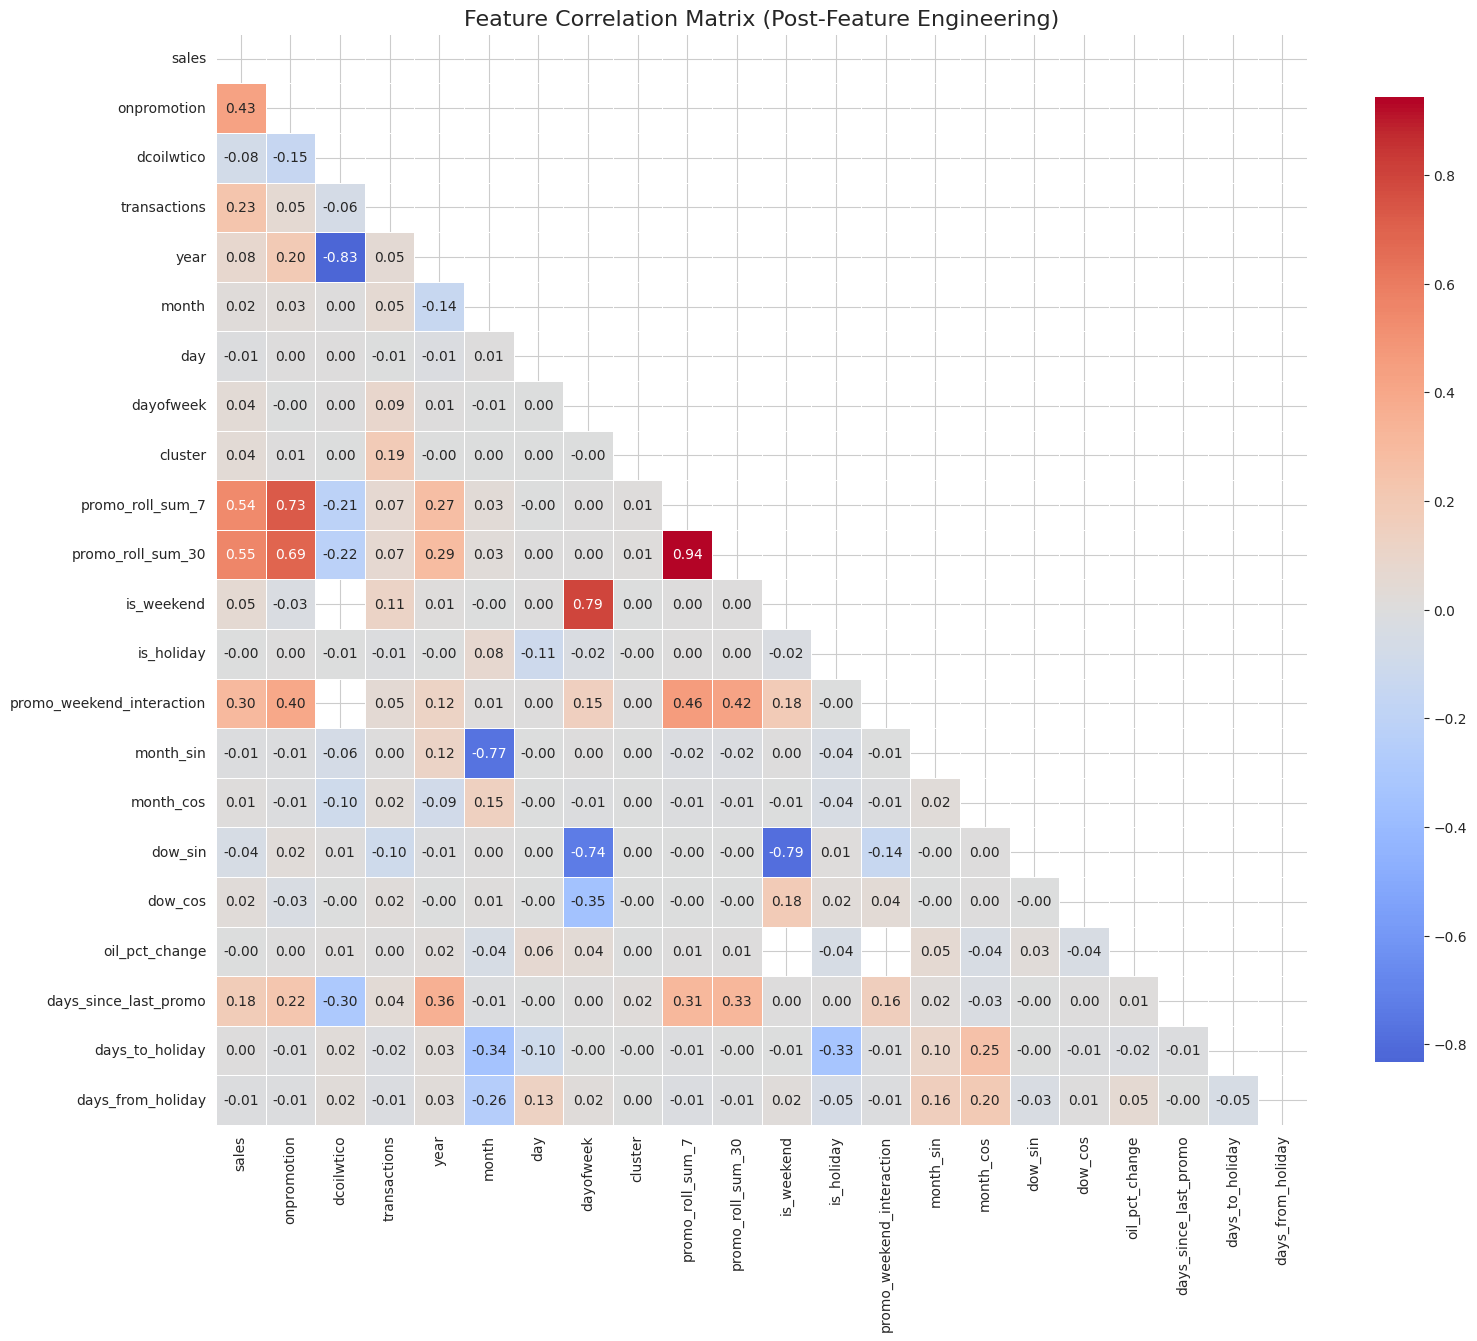

In [ ]:
import pandas as pd

train_merged = pd.read_csv('Dataset/train-final.csv')
test_merged = pd.read_csv('Dataset/test-final.csv')

# Select numerical features for correlation analysis
numerical_features = [
    'sales', 'onpromotion', 'dcoilwtico', 'transactions', 
    'year', 'month', 'day', 'dayofweek', 'cluster',
    'promo_roll_sum_7', 'promo_roll_sum_30',
    'is_weekend', 'is_holiday', 'promo_weekend_interaction',
    'month_sin', 'month_cos', 'dow_sin', 'dow_cos',
    'oil_pct_change', 'days_since_last_promo', 
    'days_to_holiday', 'days_from_holiday'
]

# Create correlation matrix
corr_data = train_merged[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_data, dtype=bool))
sns.heatmap(corr_data, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, 
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix (Post-Feature Engineering)', fontsize=16)
plt.tight_layout()
plt.show()

Top 15 Features Correlated with Sales:
sales                        1.000000
promo_roll_sum_30            0.551667
promo_roll_sum_7             0.539985
onpromotion                  0.428241
promo_weekend_interaction    0.303709
transactions                 0.233014
days_since_last_promo        0.177968
year                         0.081320
is_weekend                   0.052127
cluster                      0.038537
dayofweek                    0.037359
dow_cos                      0.021076
month                        0.020250
month_cos                    0.009446
days_to_holiday              0.000896
Name: sales, dtype: float64


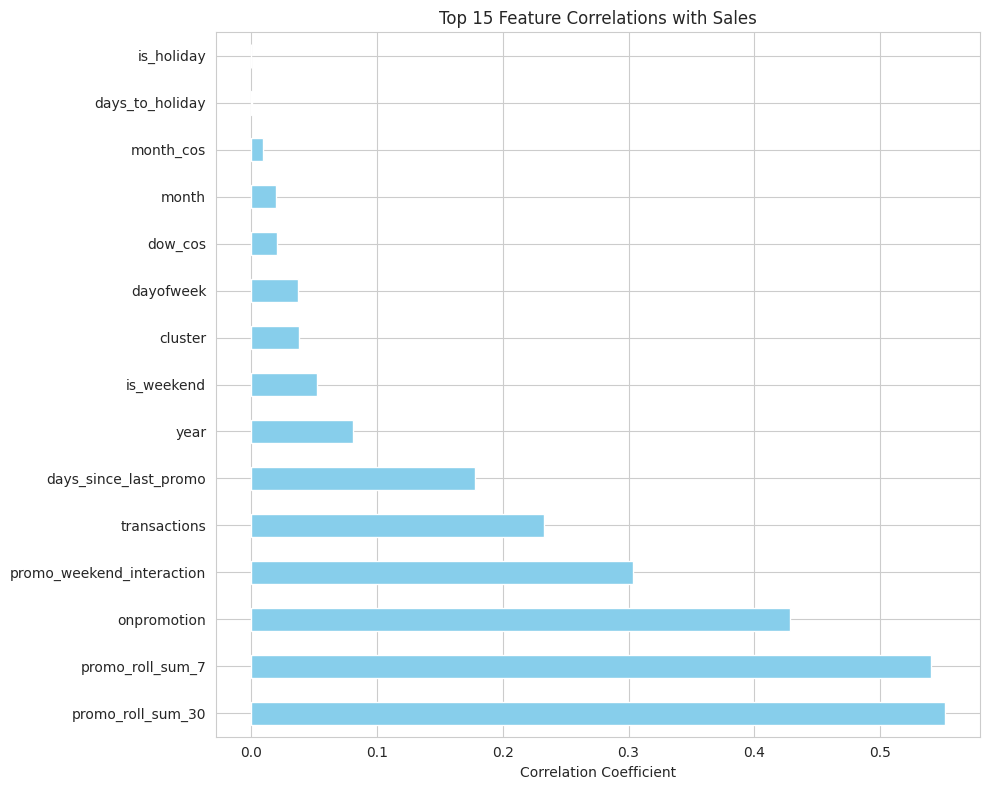

In [6]:
# Get correlations with sales
sales_corr = corr_data['sales'].sort_values(ascending=False)
print("Top 15 Features Correlated with Sales:")
print(sales_corr.head(15))

# Visualize top correlations
plt.figure(figsize=(10, 8))
sales_corr[1:16].plot(kind='barh', color='skyblue')
plt.title('Top 15 Feature Correlations with Sales')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

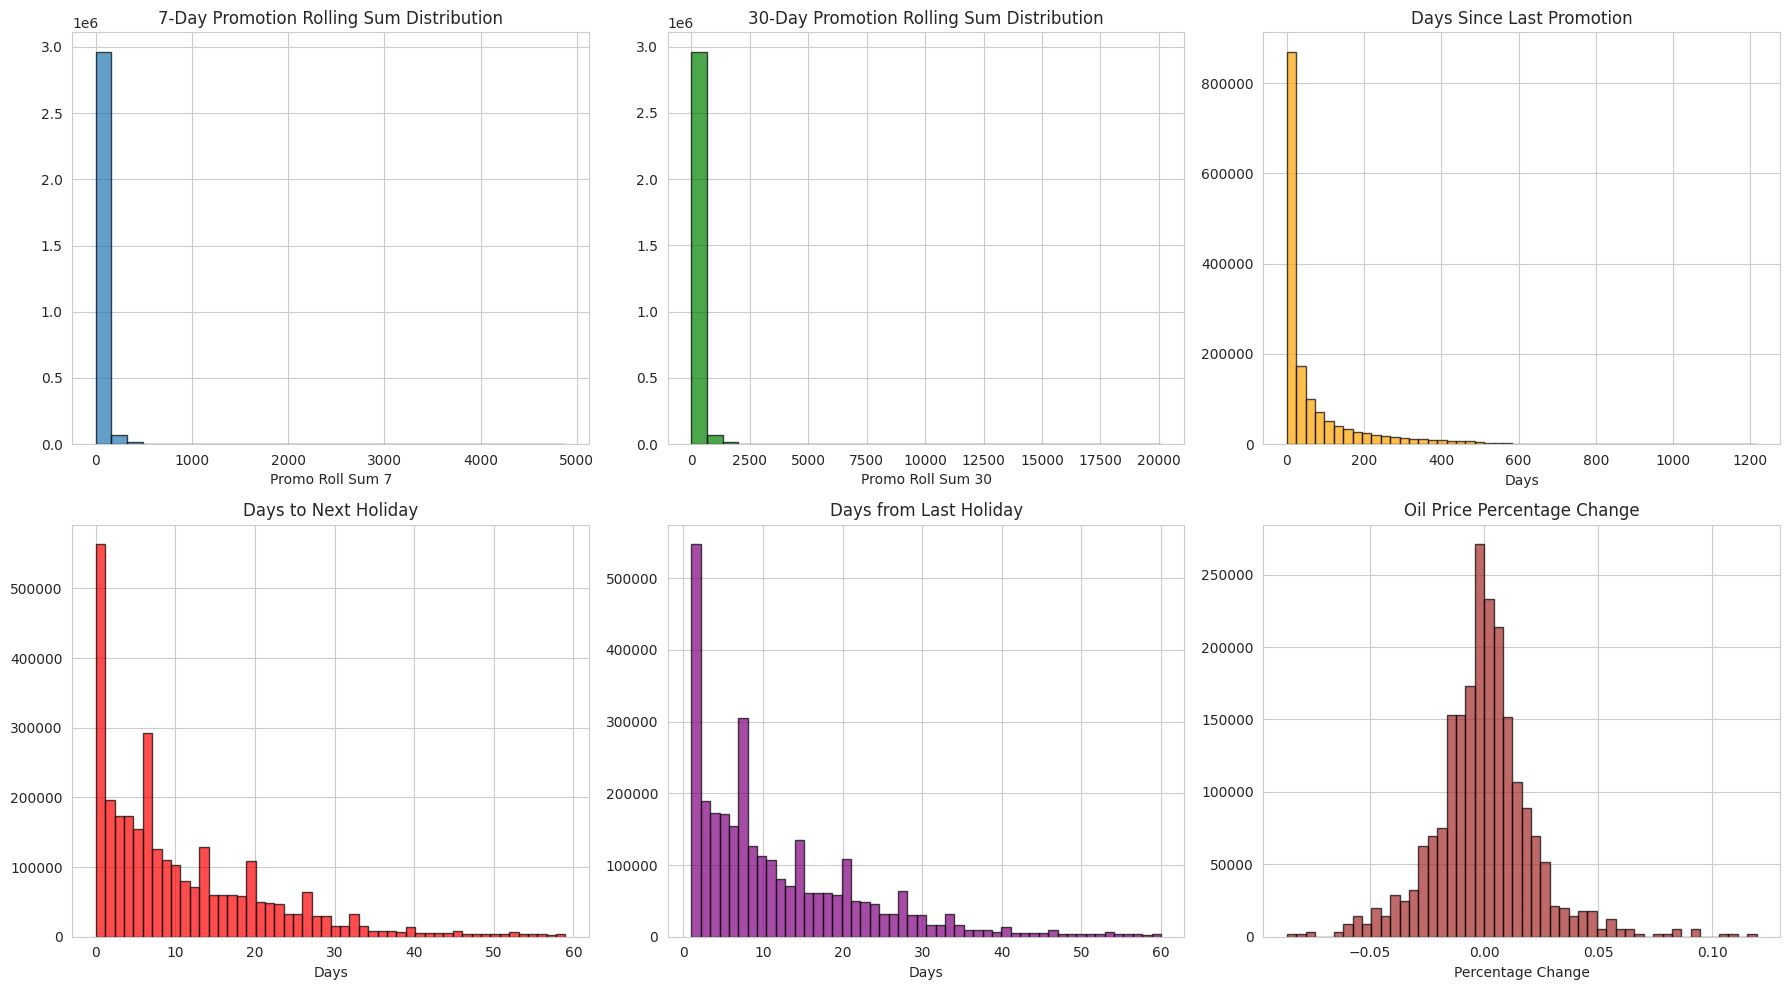

In [7]:
# Analyze key engineered features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Promotion rolling sums
axes[0, 0].hist(train_merged['promo_roll_sum_7'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('7-Day Promotion Rolling Sum Distribution')
axes[0, 0].set_xlabel('Promo Roll Sum 7')

axes[0, 1].hist(train_merged['promo_roll_sum_30'], bins=30, edgecolor='black', alpha=0.7, color='green')
axes[0, 1].set_title('30-Day Promotion Rolling Sum Distribution')
axes[0, 1].set_xlabel('Promo Roll Sum 30')

# Days since last promotion
valid_days = train_merged[train_merged['days_since_last_promo'] >= 0]['days_since_last_promo']
axes[0, 2].hist(valid_days, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 2].set_title('Days Since Last Promotion')
axes[0, 2].set_xlabel('Days')

# Holiday proximity
axes[1, 0].hist(train_merged['days_to_holiday'], bins=50, edgecolor='black', alpha=0.7, color='red')
axes[1, 0].set_title('Days to Next Holiday')
axes[1, 0].set_xlabel('Days')

axes[1, 1].hist(train_merged['days_from_holiday'], bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[1, 1].set_title('Days from Last Holiday')
axes[1, 1].set_xlabel('Days')

# Oil price change
axes[1, 2].hist(train_merged['oil_pct_change'], bins=50, edgecolor='black', alpha=0.7, color='brown')
axes[1, 2].set_title('Oil Price Percentage Change')
axes[1, 2].set_xlabel('Percentage Change')

plt.tight_layout()
plt.show()

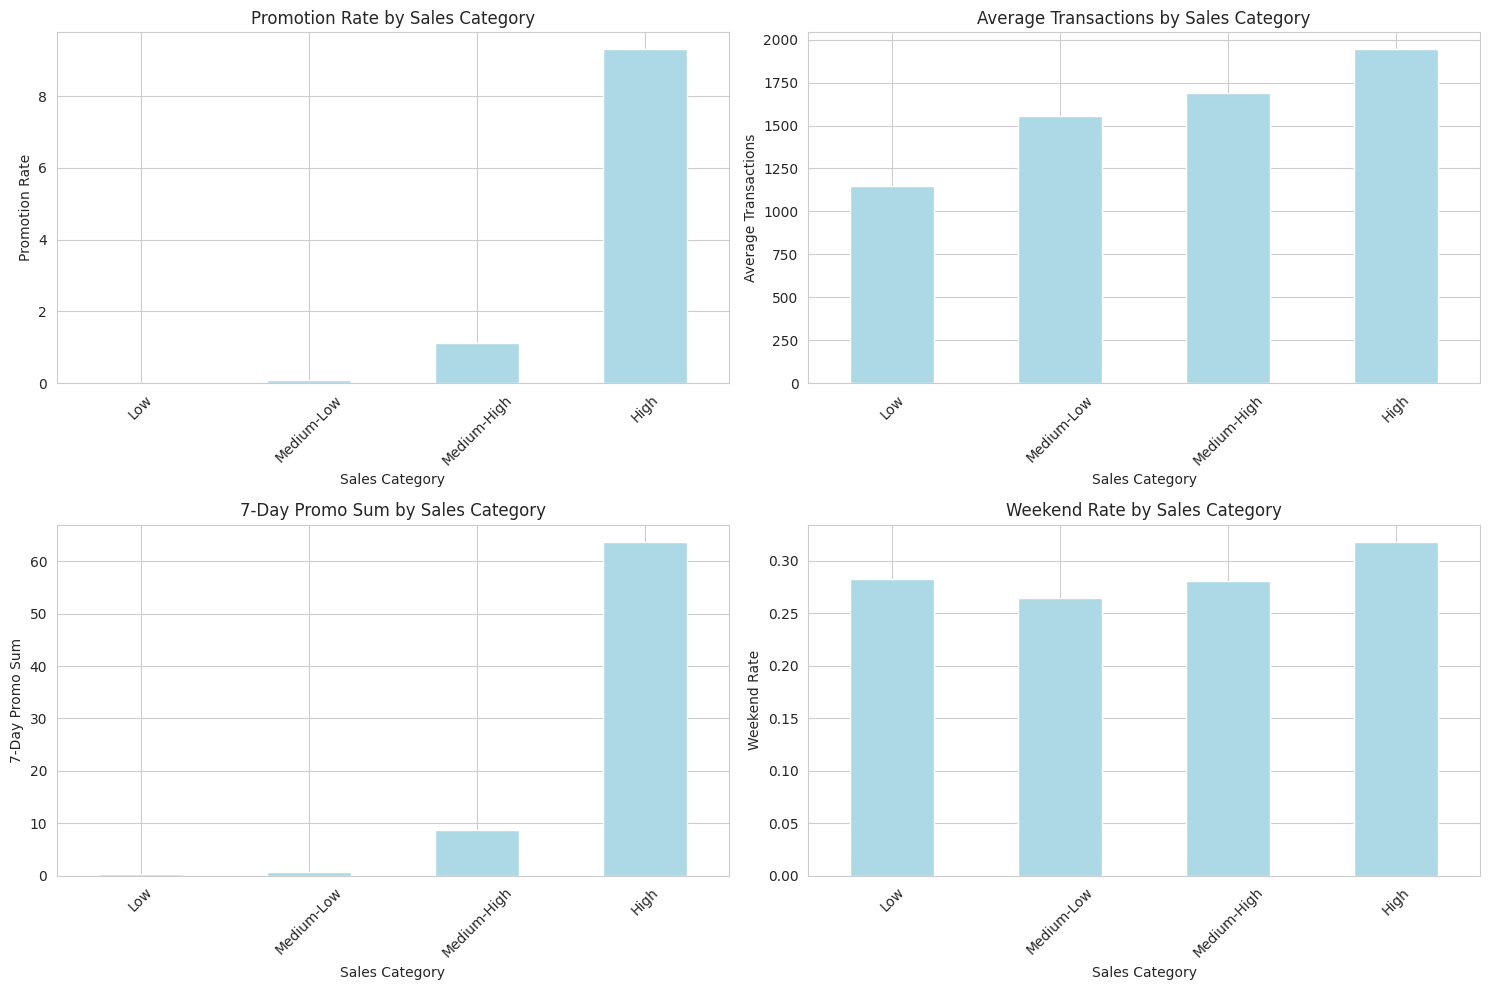

In [8]:
# Analyze features across different sales levels
sales_quantiles = train_merged['sales'].quantile([0.25, 0.5, 0.75])
train_merged['sales_category'] = pd.cut(train_merged['sales'], 
                                       bins=[-np.inf, sales_quantiles[0.25], 
                                            sales_quantiles[0.5], sales_quantiles[0.75], np.inf],
                                       labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Compare feature means across sales categories
feature_by_sales = train_merged.groupby('sales_category')[numerical_features[1:]].mean()

# Plot key features by sales category
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

features_to_plot = ['onpromotion', 'transactions', 'promo_roll_sum_7', 'is_weekend']
titles = ['Promotion Rate', 'Average Transactions', '7-Day Promo Sum', 'Weekend Rate']

for idx, (feature, title) in enumerate(zip(features_to_plot, titles)):
    ax = axes[idx // 2, idx % 2]
    feature_by_sales[feature].plot(kind='bar', ax=ax, color='lightblue')
    ax.set_title(f'{title} by Sales Category')
    ax.set_xlabel('Sales Category')
    ax.set_ylabel(title)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### T dist & Chi Square analysis

In [ ]:
# Statistical Analysis for Grocery Sales Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("STATISTICAL ANALYSIS FOR GROCERY SALES DATA")
print("=" * 80)

# =============================================================================
# T-TEST APPLICATIONS (Comparing Means Between Groups)
# =============================================================================

print("\n" + "=" * 50)
print("T-TEST APPLICATIONS")
print("=" * 50)

# -----------------------------------------------------------------------------
# 1. PROMOTION EFFECTIVENESS ANALYSIS
# -----------------------------------------------------------------------------
print("\n1. PROMOTION EFFECTIVENESS ANALYSIS")
print("-" * 40)

# Separate promoted vs non-promoted items
promoted_sales = train_merged[train_merged['onpromotion'] == 1]['sales']
non_promoted_sales = train_merged[train_merged['onpromotion'] == 0]['sales']

# Remove outliers (optional - using IQR method)
def remove_outliers(data, factor=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

promoted_clean = remove_outliers(promoted_sales)
non_promoted_clean = remove_outliers(non_promoted_sales)

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(promoted_clean, non_promoted_clean)

# Calculate effect size (Cohen's d)
pooled_std = np.sqrt(((len(promoted_clean) - 1) * promoted_clean.var() + 
                     (len(non_promoted_clean) - 1) * non_promoted_clean.var()) / 
                     (len(promoted_clean) + len(non_promoted_clean) - 2))
cohens_d = (promoted_clean.mean() - non_promoted_clean.mean()) / pooled_std

print(f"H0: No difference in average sales between promoted and non-promoted items")
print(f"H1: Promoted items have significantly different sales")
print(f"\nResults:")
print(f"Promoted items mean sales: {promoted_clean.mean():.2f}")
print(f"Non-promoted items mean sales: {non_promoted_clean.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.2e}")
print(f"Cohen's d (effect size): {cohens_d:.4f}")
print(f"Interpretation: {'REJECT H0' if p_value < 0.05 else 'FAIL TO REJECT H0'}")

if abs(cohens_d) < 0.2:
    effect_interpretation = "Small effect"
elif abs(cohens_d) < 0.5:
    effect_interpretation = "Medium effect"
else:
    effect_interpretation = "Large effect"
print(f"Effect size interpretation: {effect_interpretation}")


# -----------------------------------------------------------------------------
# 2. WEEKEND VS WEEKDAY SALES PERFORMANCE
# -----------------------------------------------------------------------------
print("\n2. WEEKEND VS WEEKDAY SALES PERFORMANCE")
print("-" * 40)

weekend_sales = train_merged[train_merged['is_weekend'] == 1]['sales']
weekday_sales = train_merged[train_merged['is_weekend'] == 0]['sales']

# Clean outliers
weekend_clean = remove_outliers(weekend_sales)
weekday_clean = remove_outliers(weekday_sales)

# T-test
t_stat, p_value = stats.ttest_ind(weekend_clean, weekday_clean)

# Effect size
pooled_std = np.sqrt(((len(weekend_clean) - 1) * weekend_clean.var() + 
                     (len(weekday_clean) - 1) * weekday_clean.var()) / 
                     (len(weekend_clean) + len(weekday_clean) - 2))
cohens_d = (weekend_clean.mean() - weekday_clean.mean()) / pooled_std

print(f"H0: No difference in average sales between weekends and weekdays")
print(f"H1: Weekend sales are significantly different from weekday sales")
print(f"\nResults:")
print(f"Weekend mean sales: {weekend_clean.mean():.2f}")
print(f"Weekday mean sales: {weekday_clean.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.2e}")
print(f"Cohen's d (effect size): {cohens_d:.4f}")
print(f"Interpretation: {'REJECT H0' if p_value < 0.05 else 'FAIL TO REJECT H0'}")

# -----------------------------------------------------------------------------
# 3. STORE TYPE PERFORMANCE COMPARISON (ANOVA)
# -----------------------------------------------------------------------------
print("\n3. STORE TYPE PERFORMANCE COMPARISON")
print("-" * 40)

# Group sales by store type
store_types = train_merged['type_x'].unique()
store_type_sales = [train_merged[train_merged['type_x'] == st]['sales'].values 
                   for st in store_types]

# One-way ANOVA
f_stat, p_value = stats.f_oneway(*store_type_sales)

print(f"H0: No difference in average sales between store types")
print(f"H1: Different store types have significantly different sales performance")
print(f"\nResults:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.2e}")
print(f"Interpretation: {'REJECT H0' if p_value < 0.05 else 'FAIL TO REJECT H0'}")

# Store type means
store_type_means = train_merged.groupby('type_x')['sales'].mean().sort_values(ascending=False)
print(f"\nStore Type Performance (Mean Sales):")
for store_type, mean_sales in store_type_means.items():
    print(f"Store Type {store_type}: {mean_sales:.2f}")

# -----------------------------------------------------------------------------
# 4. HOLIDAY PROXIMITY IMPACT
# -----------------------------------------------------------------------------
print("\n4. HOLIDAY PROXIMITY IMPACT")
print("-" * 40)

# Define pre-holiday period (1-3 days before holiday)
pre_holiday_sales = train_merged[train_merged['days_to_holiday'].between(1, 3)]['sales']
regular_days_sales = train_merged[train_merged['days_to_holiday'] > 10]['sales']

# Clean outliers
pre_holiday_clean = remove_outliers(pre_holiday_sales)
regular_clean = remove_outliers(regular_days_sales)

# T-test
t_stat, p_value = stats.ttest_ind(pre_holiday_clean, regular_clean)

# Effect size
pooled_std = np.sqrt(((len(pre_holiday_clean) - 1) * pre_holiday_clean.var() + 
                     (len(regular_clean) - 1) * regular_clean.var()) / 
                     (len(pre_holiday_clean) + len(regular_clean) - 2))
cohens_d = (pre_holiday_clean.mean() - regular_clean.mean()) / pooled_std

print(f"H0: No difference in sales before holidays vs regular days")
print(f"H1: Sales are significantly different before holidays")
print(f"\nResults:")
print(f"Pre-holiday mean sales: {pre_holiday_clean.mean():.2f}")
print(f"Regular days mean sales: {regular_clean.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.2e}")
print(f"Cohen's d (effect size): {cohens_d:.4f}")
print(f"Interpretation: {'REJECT H0' if p_value < 0.05 else 'FAIL TO REJECT H0'}")

# -----------------------------------------------------------------------------
# 5. OIL PRICE SHOCK IMPACT
# -----------------------------------------------------------------------------
print("\n5. OIL PRICE SHOCK IMPACT")
print("-" * 40)

# Define oil price shock as changes > 2 standard deviations
oil_std = train_merged['oil_pct_change'].std()
oil_threshold = 2 * oil_std

shock_periods = train_merged[abs(train_merged['oil_pct_change']) > oil_threshold]['sales']
stable_periods = train_merged[abs(train_merged['oil_pct_change']) <= oil_std]['sales']

# Clean outliers
shock_clean = remove_outliers(shock_periods)
stable_clean = remove_outliers(stable_periods)

# T-test
t_stat, p_value = stats.ttest_ind(shock_clean, stable_clean)

# Effect size
pooled_std = np.sqrt(((len(shock_clean) - 1) * shock_clean.var() + 
                     (len(stable_clean) - 1) * stable_clean.var()) / 
                     (len(shock_clean) + len(stable_clean) - 2))
cohens_d = (shock_clean.mean() - stable_clean.mean()) / pooled_std

print(f"H0: No difference in sales during oil price shocks vs stable periods")
print(f"H1: Oil price volatility significantly affects sales")
print(f"\nResults:")
print(f"Oil shock periods mean sales: {shock_clean.mean():.2f}")
print(f"Stable periods mean sales: {stable_clean.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.2e}")
print(f"Cohen's d (effect size): {cohens_d:.4f}")
print(f"Interpretation: {'REJECT H0' if p_value < 0.05 else 'FAIL TO REJECT H0'}")

# =============================================================================
# CHI-SQUARE TEST APPLICATIONS (Testing Independence)
# =============================================================================

print("\n" + "=" * 50)
print("CHI-SQUARE TEST APPLICATIONS")
print("=" * 50)

# -----------------------------------------------------------------------------
# 1. PROMOTION STRATEGY VS SALES PERFORMANCE
# -----------------------------------------------------------------------------
print("\n1. PROMOTION STRATEGY VS SALES PERFORMANCE")
print("-" * 40)

# Create sales quartiles
sales_quartiles = train_merged['sales'].quantile([0.25, 0.5, 0.75])
train_merged['sales_quartile'] = pd.cut(train_merged['sales'], 
                                       bins=[-np.inf, sales_quartiles[0.25], 
                                            sales_quartiles[0.5], sales_quartiles[0.75], np.inf],
                                       labels=['Q1_Low', 'Q2_Med_Low', 'Q3_Med_High', 'Q4_High'])

# Create contingency table
contingency_table = pd.crosstab(train_merged['onpromotion'], train_merged['sales_quartile'])
print("Contingency Table:")
print(contingency_table)

# Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Cramér's V (effect size)
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"\nH0: Promotion usage is independent of sales performance level")
print(f"H1: Promotion usage is associated with sales performance level")
print(f"\nResults:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.2e}")
print(f"Degrees of freedom: {dof}")
print(f"Cramér's V (effect size): {cramers_v:.4f}")
print(f"Interpretation: {'REJECT H0' if p_value < 0.05 else 'FAIL TO REJECT H0'}")

# -----------------------------------------------------------------------------
# 2. STORE LOCATION VS PERFORMANCE
# -----------------------------------------------------------------------------
print("\n2. STORE LOCATION VS PERFORMANCE")
print("-" * 40)

# Create high-performance indicator (top 25% of stores by average sales)
store_performance = train_merged.groupby('store_nbr')['sales'].mean()
high_performance_threshold = store_performance.quantile(0.75)
high_performance_stores = store_performance[store_performance >= high_performance_threshold].index

# Add performance indicator to main dataset
train_merged['high_performance'] = train_merged['store_nbr'].isin(high_performance_stores).astype(int)

# Create contingency table for state vs performance
contingency_table = pd.crosstab(train_merged['state'], train_merged['high_performance'])
print("Contingency Table (State vs High Performance):")
print(contingency_table)

# Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Cramér's V
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"\nH0: Store location is independent of sales performance")
print(f"H1: Certain locations are associated with better performance")
print(f"\nResults:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.2e}")
print(f"Degrees of freedom: {dof}")
print(f"Cramér's V (effect size): {cramers_v:.4f}")
print(f"Interpretation: {'REJECT H0' if p_value < 0.05 else 'FAIL TO REJECT H0'}")

# Show performance by state
state_performance = train_merged.groupby('state').agg({
    'sales': 'mean',
    'high_performance': 'mean'
}).sort_values('sales', ascending=False)
print(f"\nState Performance Summary:")
print(state_performance)

# =============================================================================
# SUMMARY OF ALL TESTS
# =============================================================================

print("\n" + "=" * 80)
print("SUMMARY OF STATISTICAL TESTS")
print("=" * 80)

print("\nT-TESTS (Mean Comparisons):")
print("1. Promotion Effectiveness - Tests if promotions increase sales")
print("2. Weekend vs Weekday - Tests if weekend sales differ from weekday sales")
print("3. Store Type Performance - Tests if different store types perform differently")
print("4. Holiday Proximity - Tests if pre-holiday sales are different")
print("5. Oil Price Shocks - Tests if oil volatility affects sales")

print("\nCHI-SQUARE TESTS (Independence):")
print("1. Promotion Strategy vs Sales Performance - Tests if promotion usage relates to performance")
print("2. Store Location vs Performance - Tests if location affects performance")

print("\nInterpretation Guidelines:")
print("- P-value < 0.05: Reject H0 (statistically significant)")
print("- Cohen's d: <0.2 (small), 0.2-0.5 (medium), >0.5 (large) effect")
print("- Cramér's V: <0.1 (small), 0.1-0.3 (medium), >0.3 (large) association")
print("=" * 80)

STATISTICAL ANALYSIS FOR GROCERY SALES DATA

T-TEST APPLICATIONS

1. PROMOTION EFFECTIVENESS ANALYSIS
----------------------------------------
H0: No difference in average sales between promoted and non-promoted items
H1: Promoted items have significantly different sales

Results:
Promoted items mean sales: 211.52
Non-promoted items mean sales: 12.75
T-statistic: 1045.1141
P-value: 0.00e+00
Cohen's d (effect size): 2.7245
Interpretation: REJECT H0
Effect size interpretation: Large effect

2. WEEKEND VS WEEKDAY SALES PERFORMANCE
----------------------------------------
H0: No difference in average sales between weekends and weekdays
H1: Weekend sales are significantly different from weekday sales

Results:
Weekend mean sales: 73.24
Weekday mean sales: 54.16
T-statistic: 127.6040
P-value: 0.00e+00
Cohen's d (effect size): 0.1749
Interpretation: REJECT H0

3. STORE TYPE PERFORMANCE COMPARISON
----------------------------------------
H0: No difference in average sales between store types
H